# Foundations of Data Analysis
## Supervised Learning Lab

### Marc Martin Dollmann 11928878

In [5]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from kfda import Kfda

# 2 Understanding the Dataset

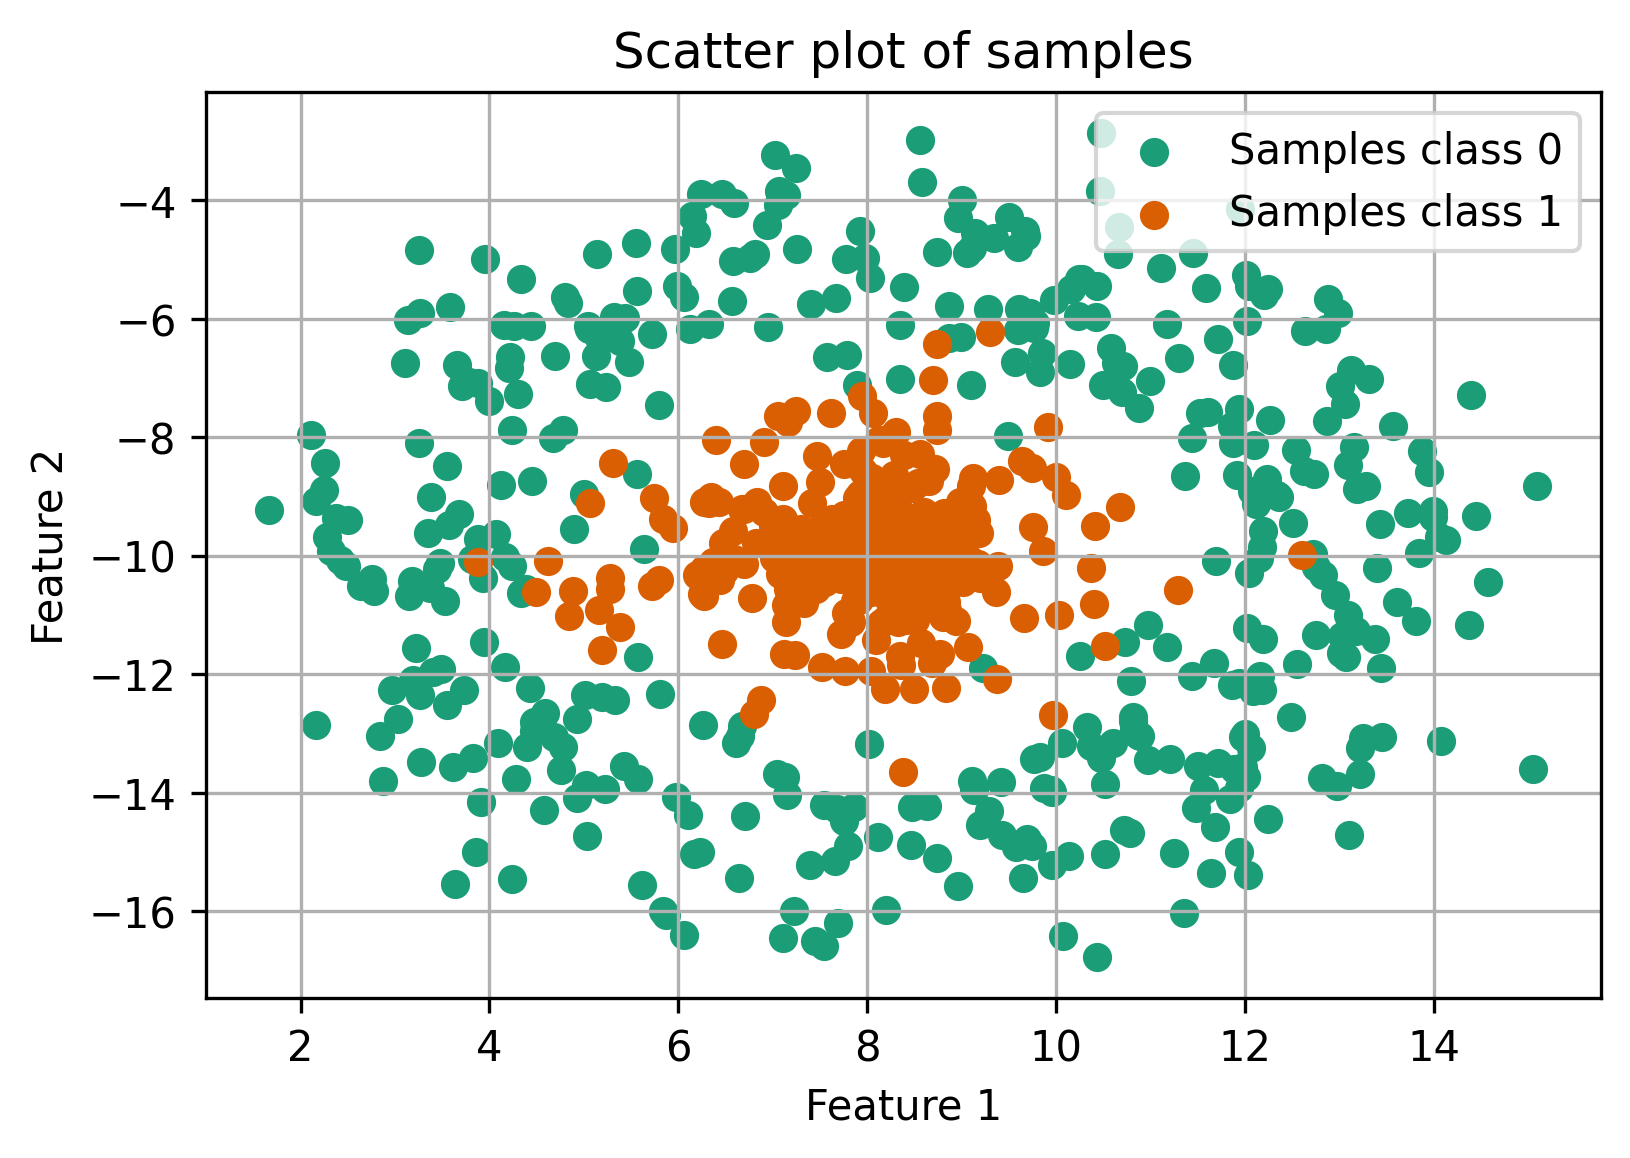

In [22]:
#load features as float and labels as bool
features = np.genfromtxt('features.csv', dtype=float, delimiter=' ')
labels = np.asarray(np.genfromtxt('labels.csv', delimiter=' '), dtype=bool)

#generate scatterplot
plt.figure(1, dpi=300)
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter( features[~labels,0], features[~labels,1], color='#1b9e77')
plt.scatter( features[labels,0], features[labels,1], color='#d95f02')
plt.legend(['Samples class 0', 'Samples class 1'])
plt.title("Scatter plot of samples")
plt.show()

The data is not linearly separable as it is given. But as sample class 1 forms a disk and sample class 0 forms a ring around sample class 1, they can be separated by a circle. Hence, mapping the data points to their euclidean distance from their central point, which is roughly at $(8,-10)$, would make them linearly separable.

# 3 Setting up a classifier
## Splitting the data set

In [7]:
#create random permutation to shuffle data
p = np.random.permutation(len(features))
features = features[p]
labels = labels[p]

#select training and testing data
train_data = features[0:int(3*len(features)/4)]
train_labels = labels[0:int(3*len(features)/4)]
test_data = features[int(3*len(features)/4):len(features)]
test_labels = labels[int(3*len(features)/4):len(features)]

#set up classifier
classifier = Kfda(kernel='rbf', n_components=1, gamma=0.2)
classifier.fit(train_data, train_labels)
print("Score of training data:", classifier.score(train_data, train_labels))
print("Score of testing data: ", classifier.score(test_data, test_labels))

Score of training data: 0.979047619047619
Score of testing data:  0.9714285714285714


When plotting the data, one could see that there are some outliers. Some data points of one sample class are well into the area of the other. This explains why the classifiers isn't perfect. The difference in scores could come from the random allocation of outliers. The outliers in the training data will skew the results towards that, giving a worse result for the testing data where there will be different outliers. If the outliers are evenly distributed, the results should be nearly identical. But with such a low number of outliers (maybe 20 or 30), it might be the case that the most significant outliers of class 0 will get allocated to the training data and the most significant ones of class 1 to the testing data.

# 4 Learning Curves

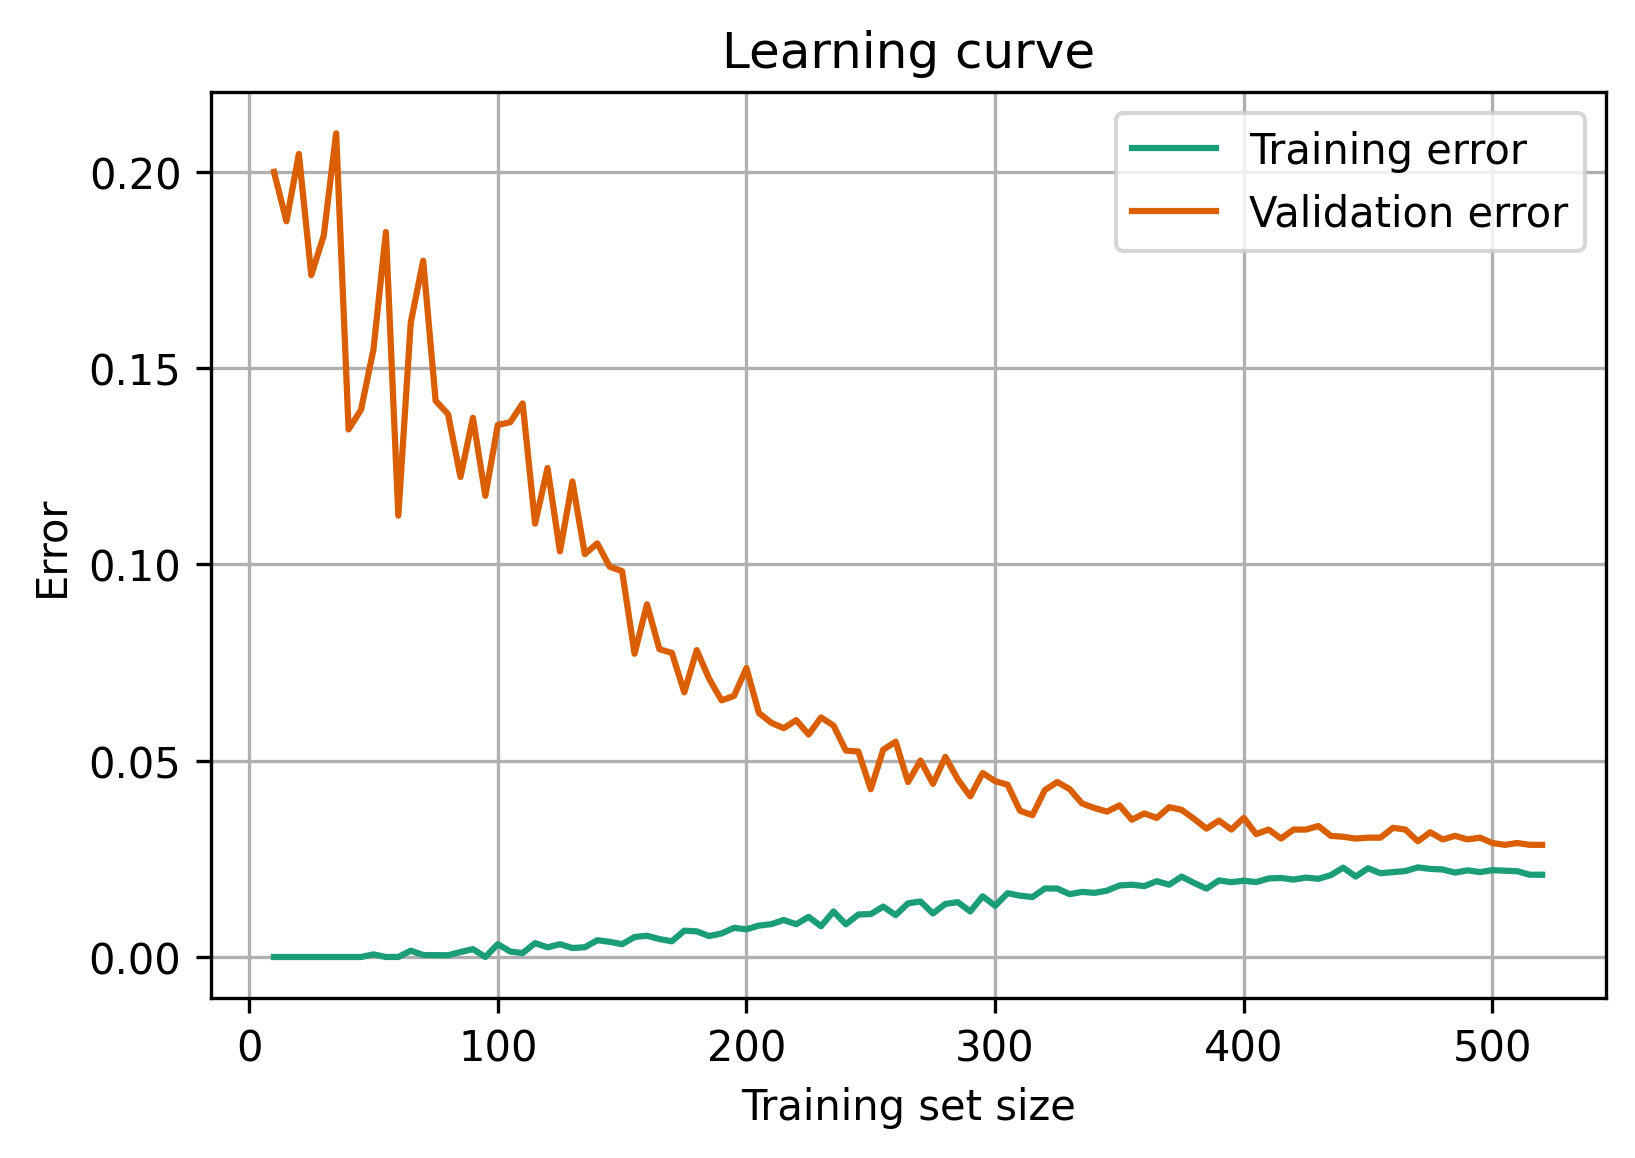

In [77]:
#set minimum training set size to avoid having only one sample class
train_min = 10

#initialize storage
scores = np.empty((0,3))

for i in range(train_min, len(train_data), 5):
    #set sums to 0
    sum_train = 0
    sum_test = 0
    
    #set number of repetitions for each training subset size
    repetitions = 25
    
    for j in range(repetitions):
        #permute training data before selecting subset   
        p = np.random.permutation(len(train_data))
        train_data = train_data[p]
        train_labels = train_labels[p]    

        #select subset of training data
        train_data_i = train_data[0:i + train_min]
        train_labels_i = train_labels[0:i + train_min]
        
        #set up classifier
        classifier_i = Kfda(kernel='rbf', n_components=1, gamma=0.2)
        try:
            classifier_i.fit(train_data_i, train_labels_i)
        except:
            continue
            
        
        #record training and validation error and training set size
        sum_train += 1 - classifier_i.score(train_data_i, train_labels_i)
        sum_test += 1 - classifier_i.score(test_data, test_labels) 

    #calculate average
    sum_train /= repetitions
    sum_test /= repetitions
    
    #record training and validation error and training set size
    scores = np.vstack([scores, [sum_train, sum_test, i]])


#plot learning curve
plt.figure(2, dpi=300)
plt.grid()
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.plot(scores[:,2], scores[:,0], color='#1b9e77')
plt.plot(scores[:,2], scores[:,1], color='#d95f02')
plt.legend(['Training error', 'Validation error'])
plt.title("Learning curve")
plt.show()

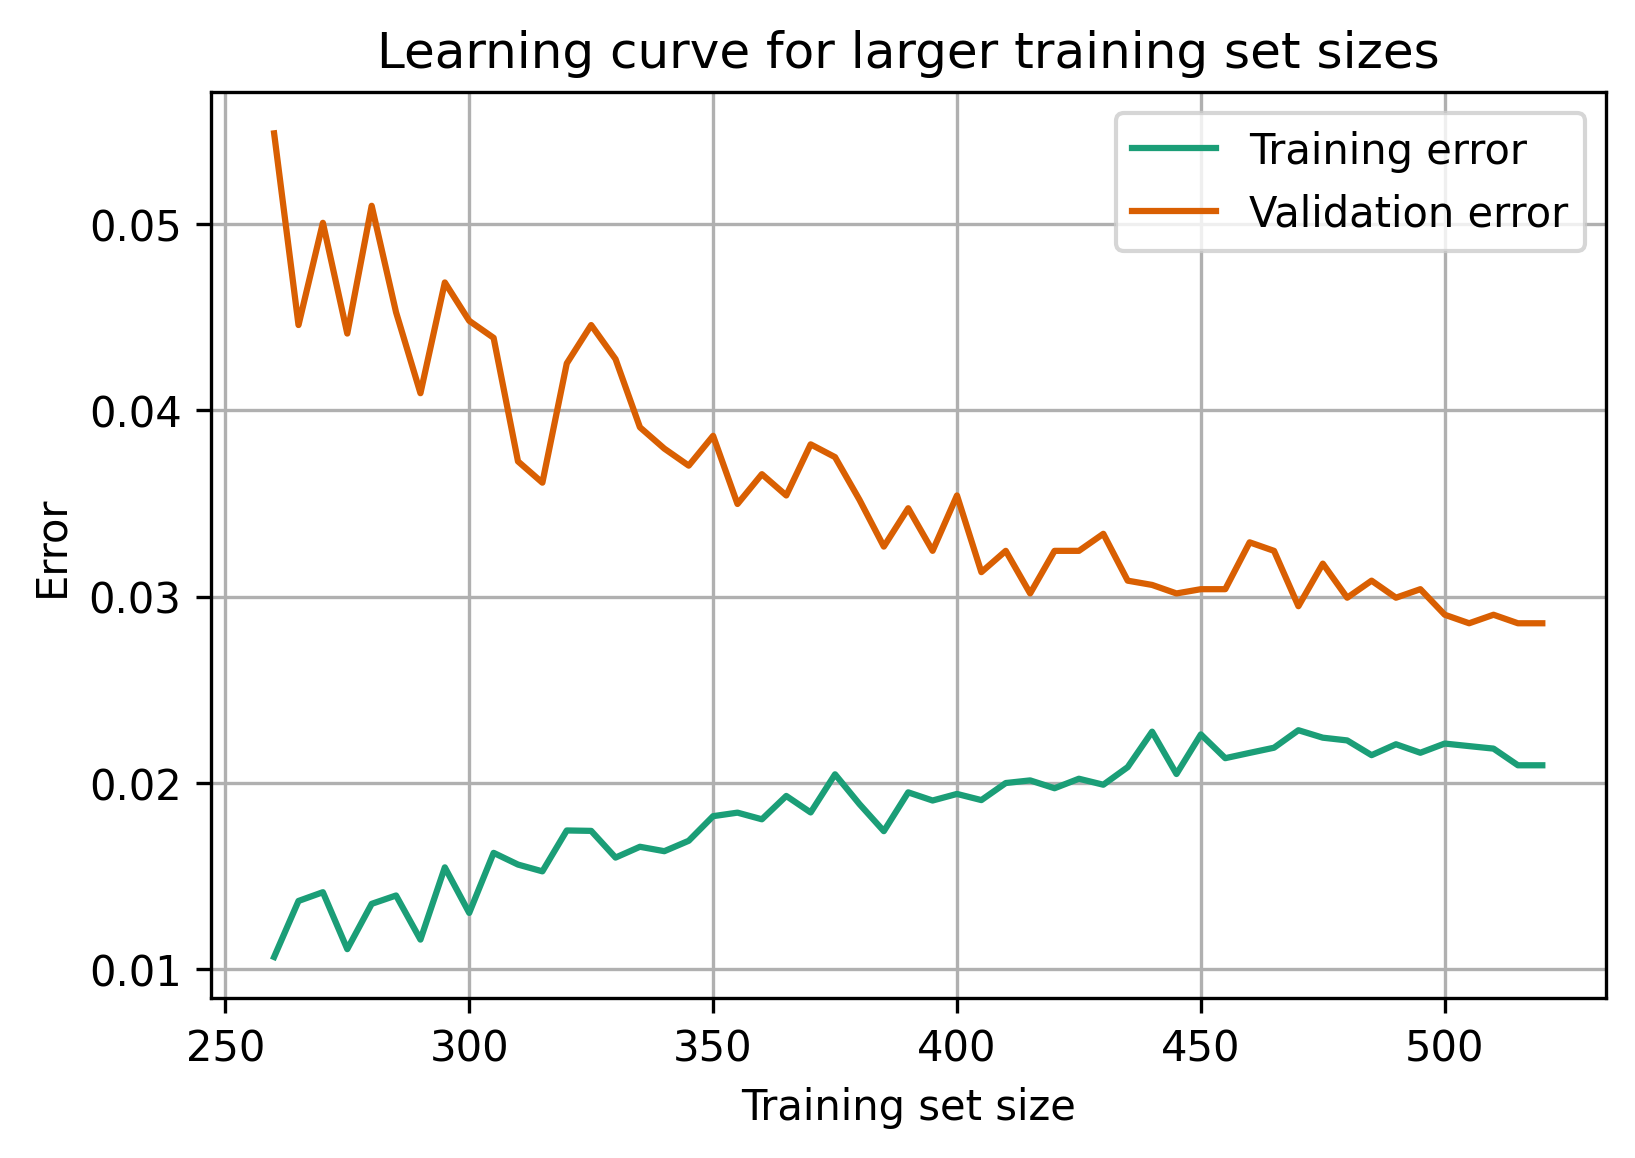

In [80]:
#plot only values larger than 300
plt.figure(3, dpi=300)
plt.grid()
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.plot(scores[50:,2], scores[50:,0], color='#1b9e77')
plt.plot(scores[50:,2], scores[50:,1], color='#d95f02')
plt.legend(['Training error', 'Validation error'])
plt.title("Learning curve for larger training set sizes")
plt.show()

The training error rises linearly from 0 to a little over 2%. This is expected as increasing the training set size will increase the number of ouliers included in it. Increasing the training set size will also cause the quality of the classifier to increase. This is reflected in the decreasing validation error. It starts at over 20% and after reaching a training ste size of 250 stop falling linearly and starts approaching the training error asymptotically. With a maximal training set size there is only a percentage point of difference between the training and validaiton error. To furhter decrease the validation error, one would have to collect more samples to train the classifier on, and to decrease the training error one would need to consider a larger or tweak the existing hypothesis class. The latter will be done next, when the learning curves are plotted for different values of gamma.

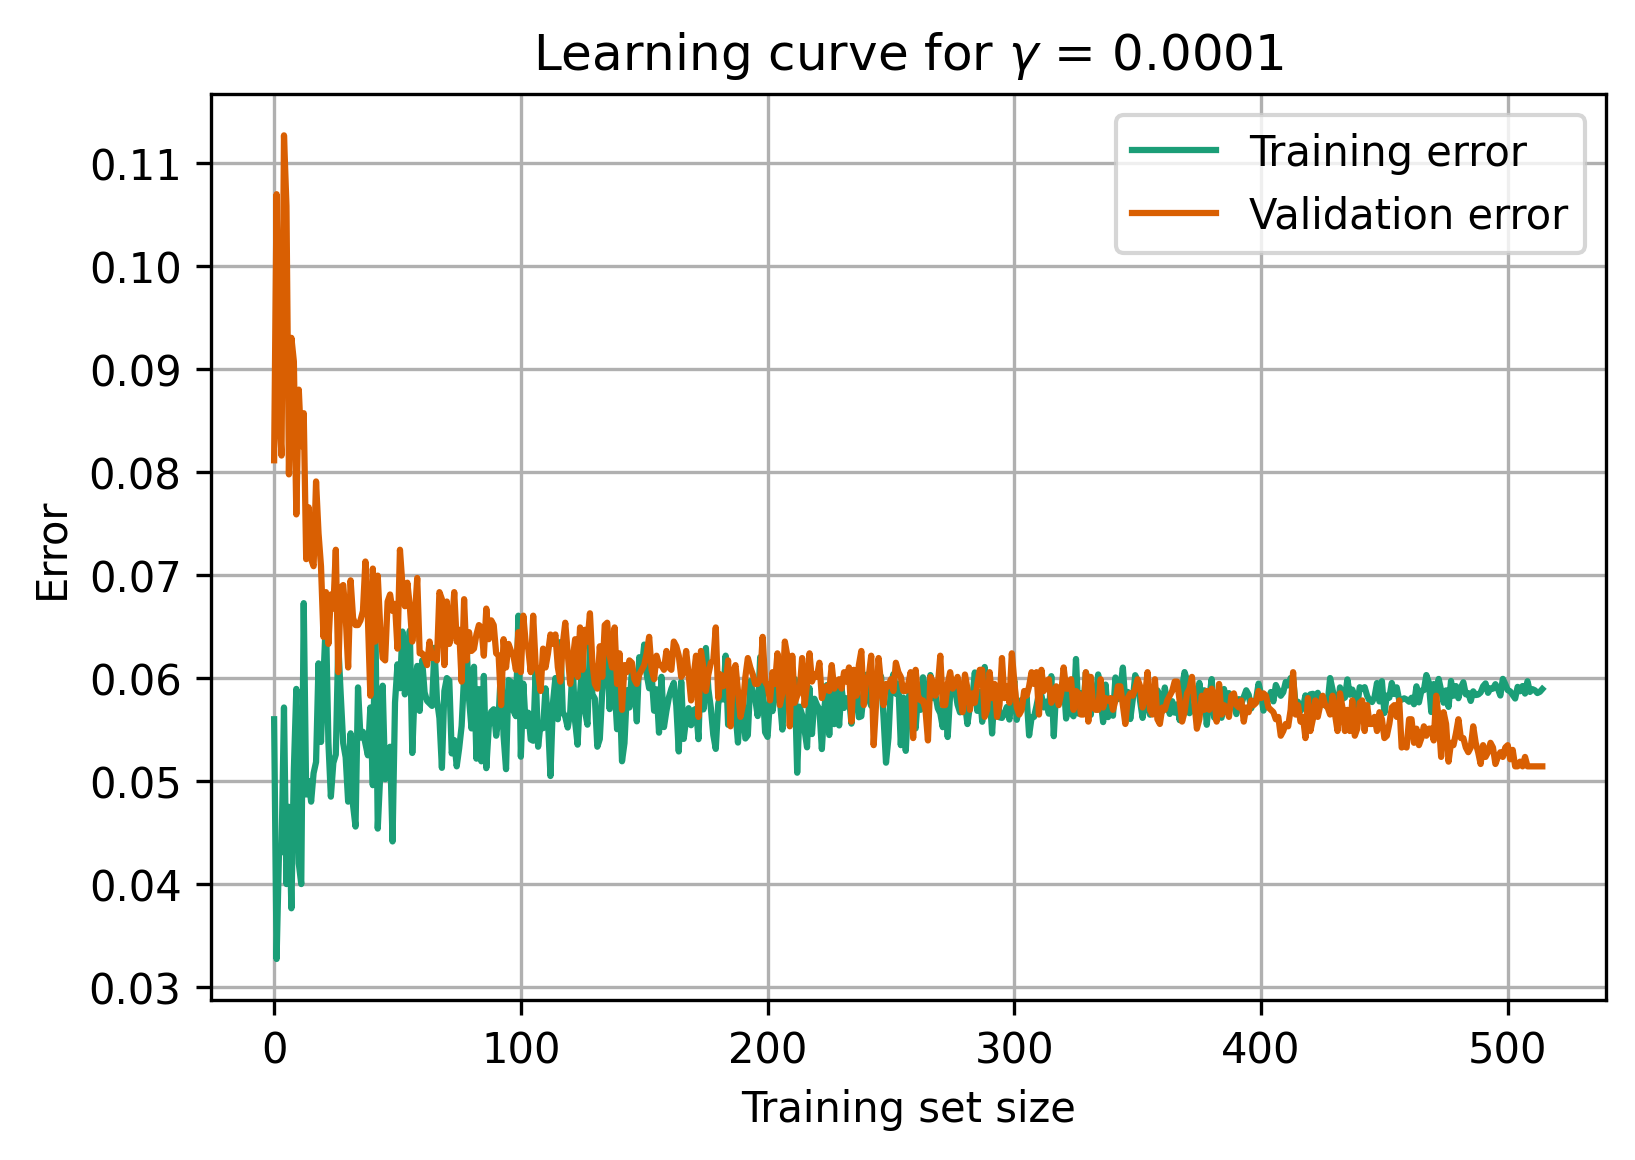

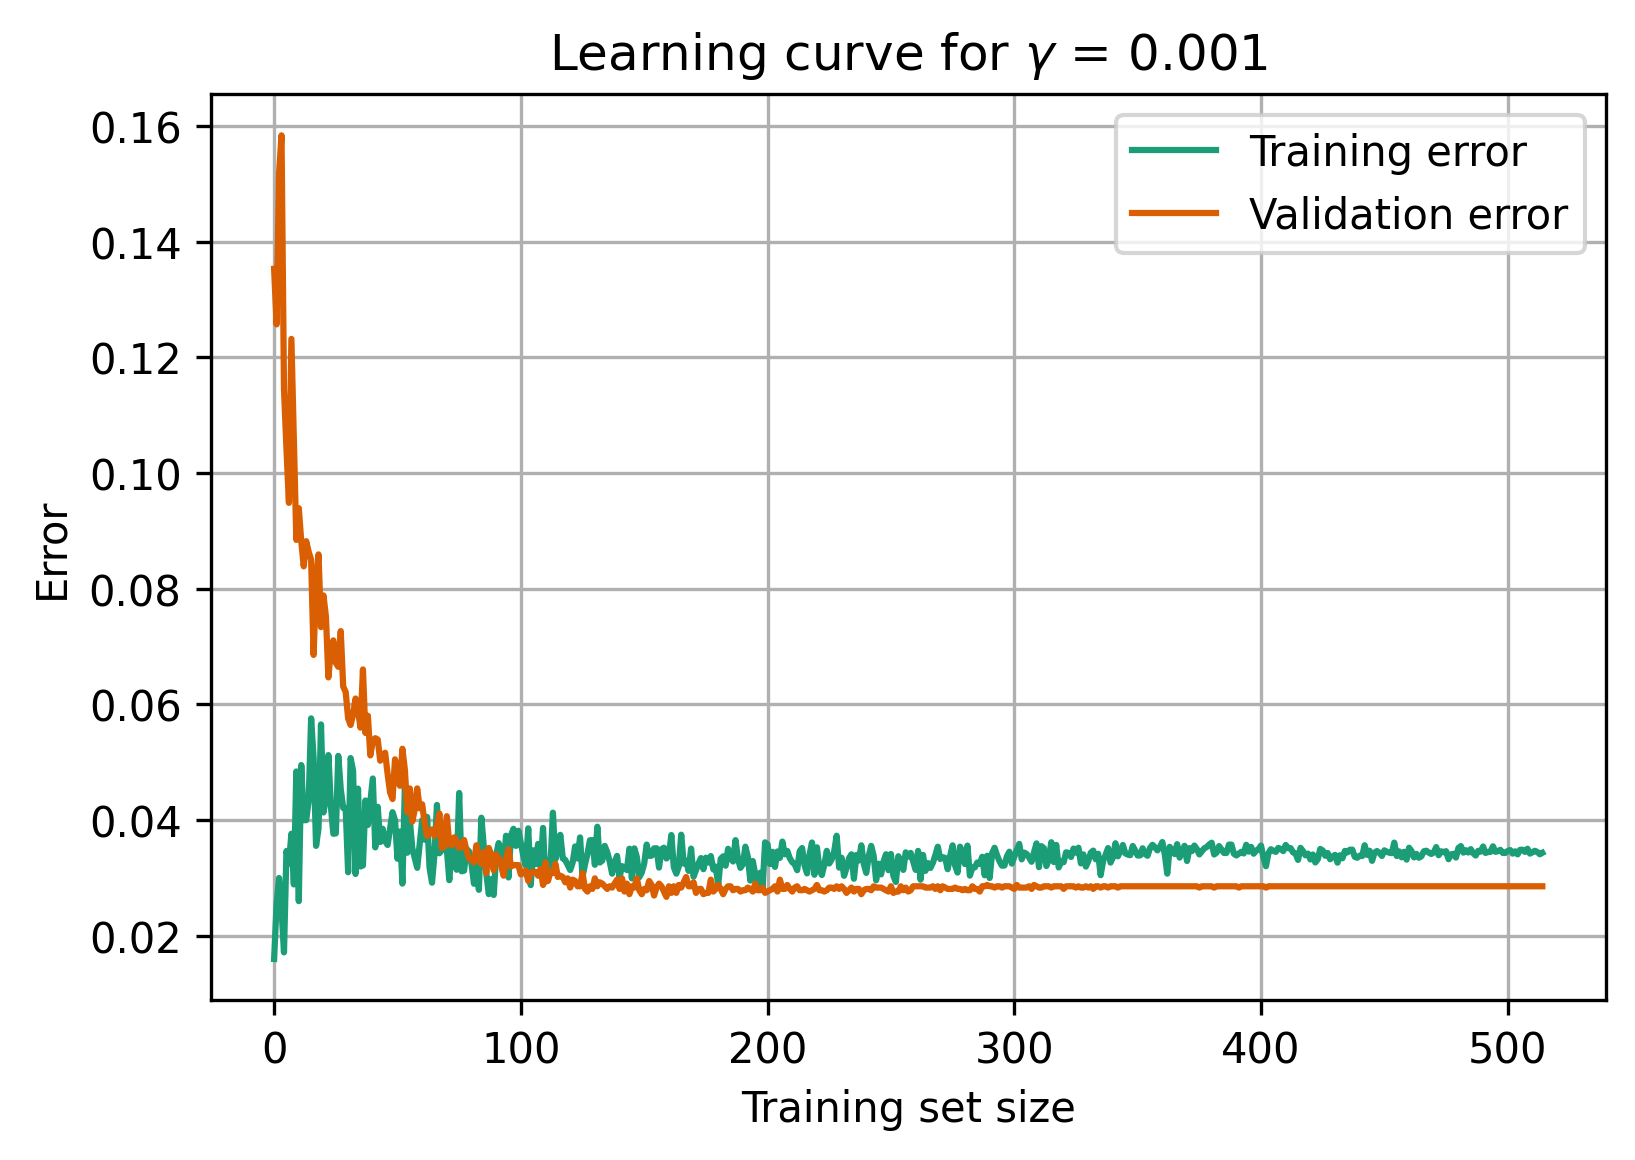

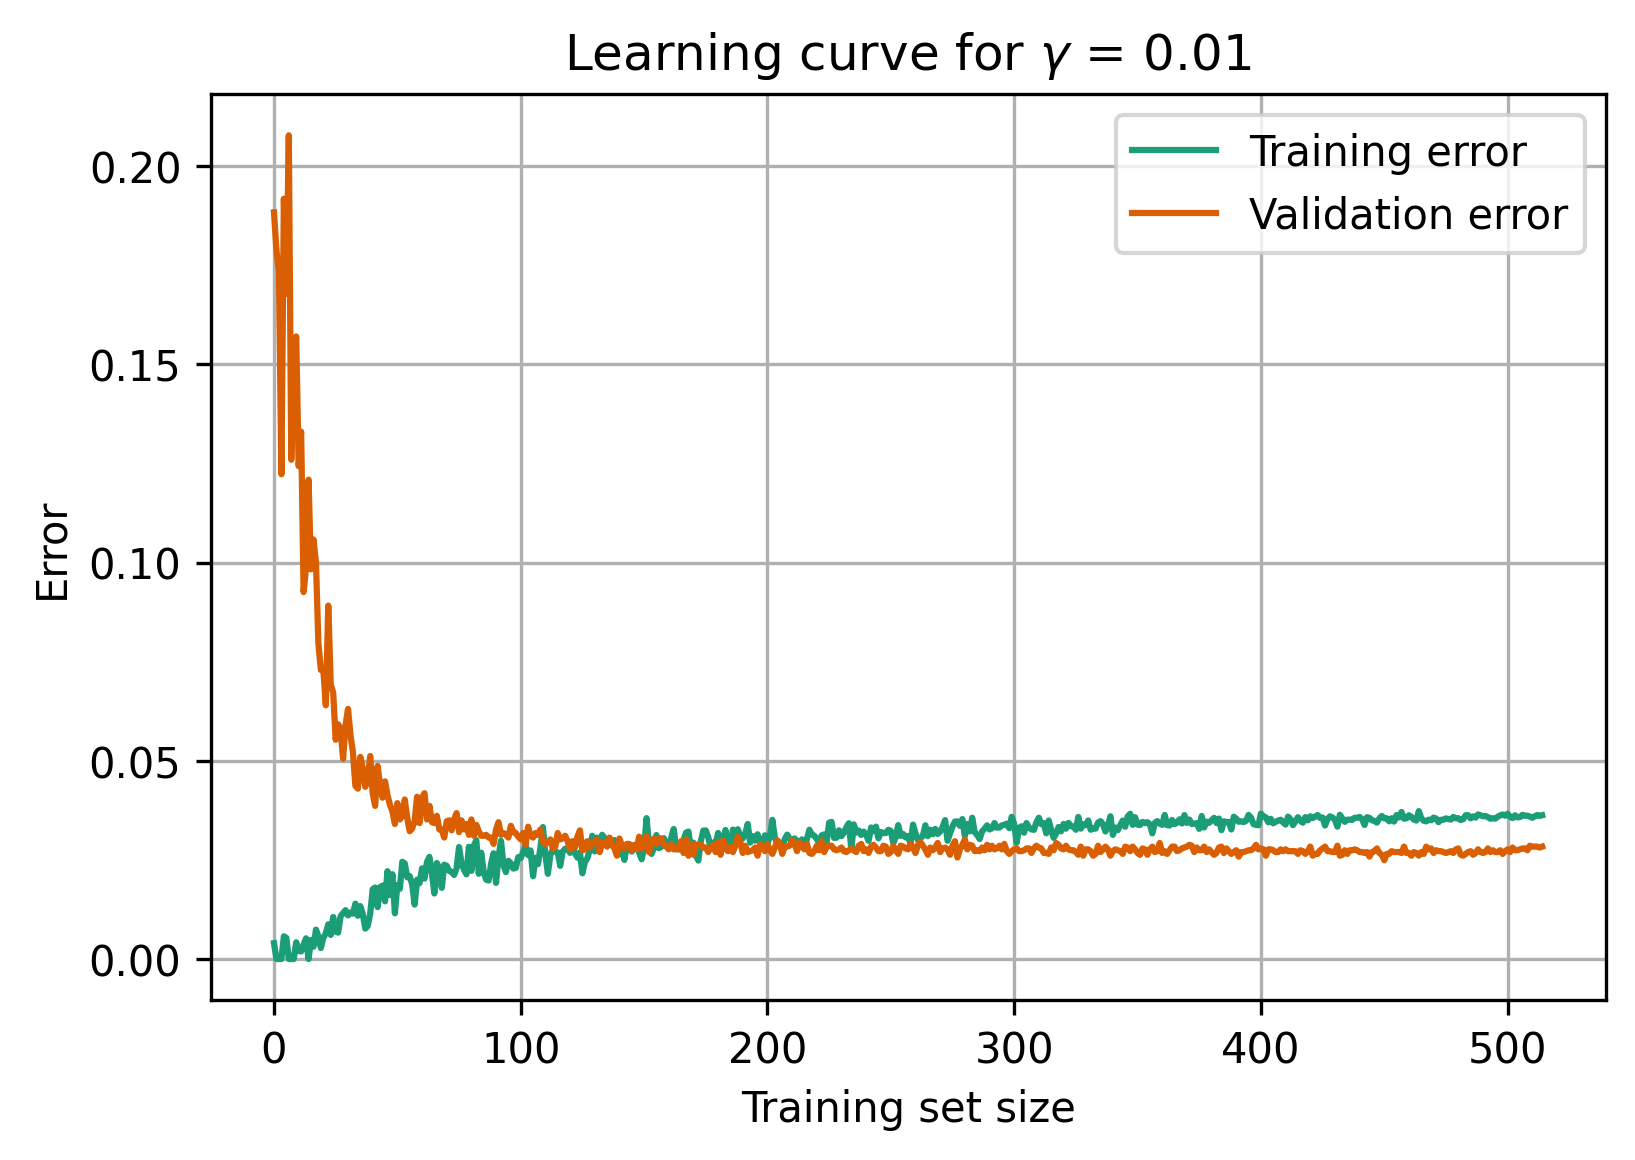

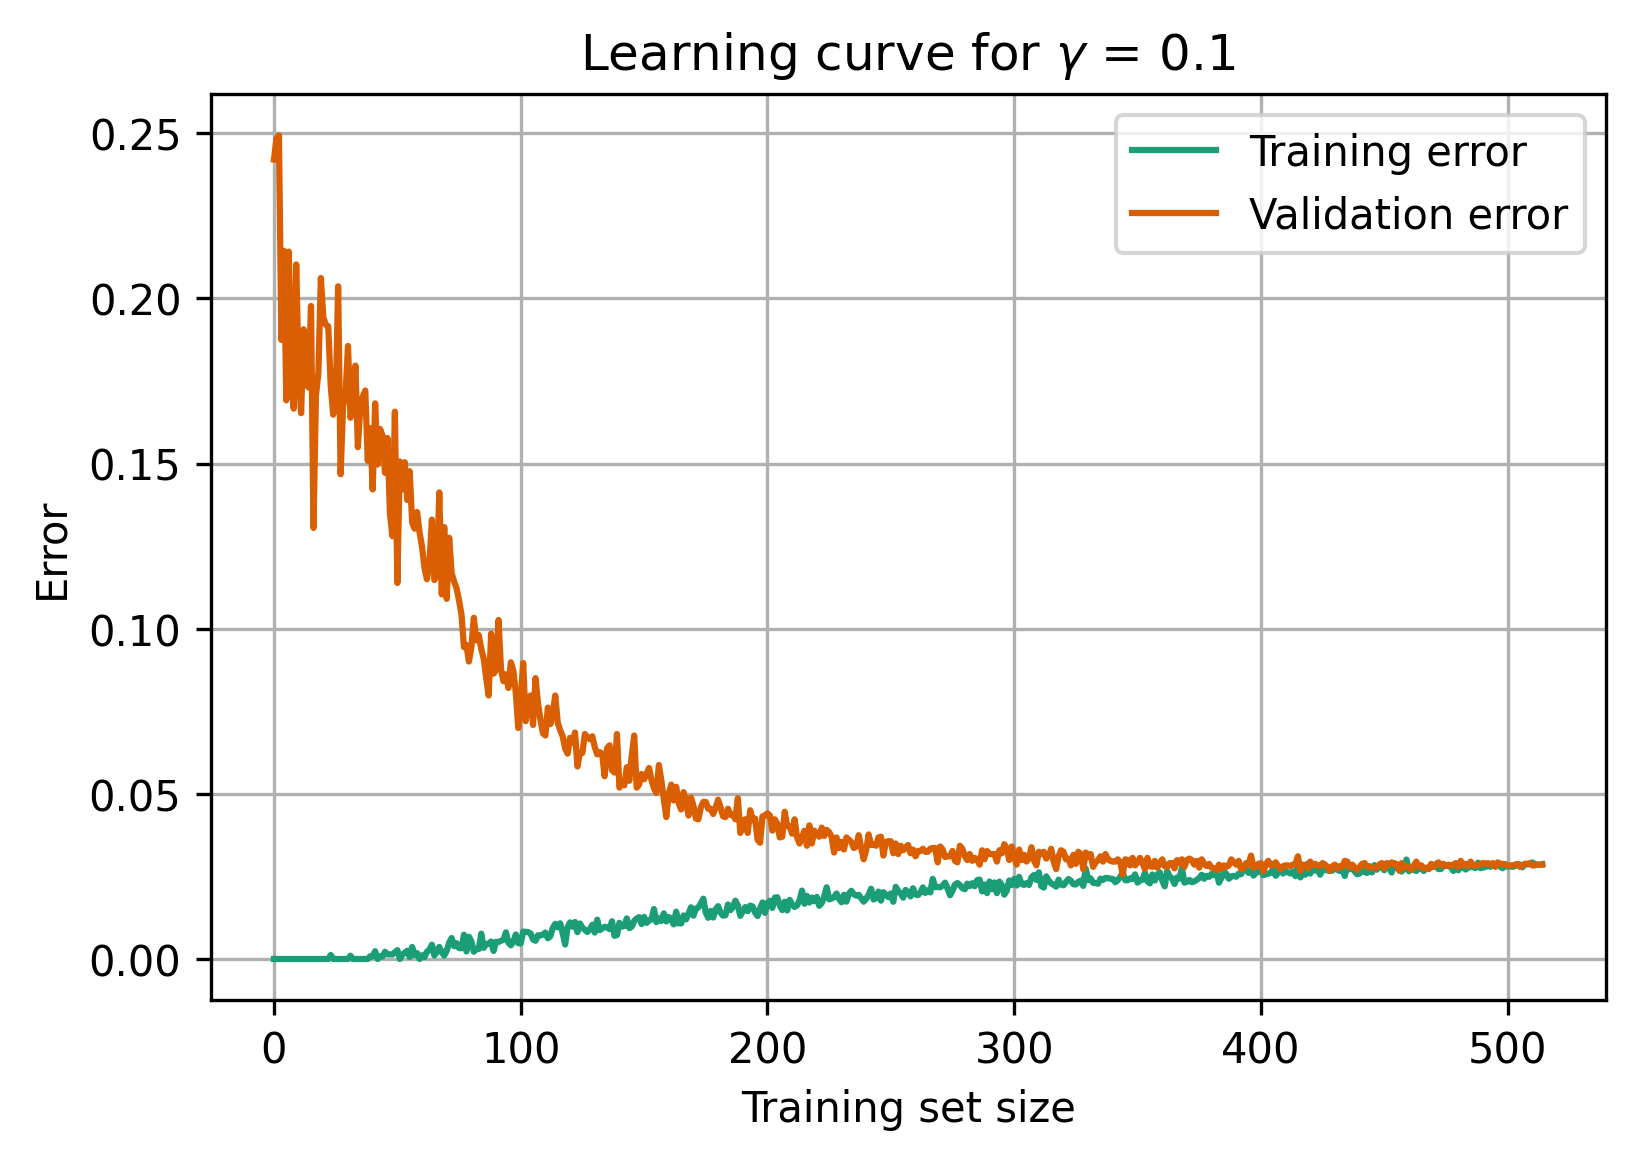

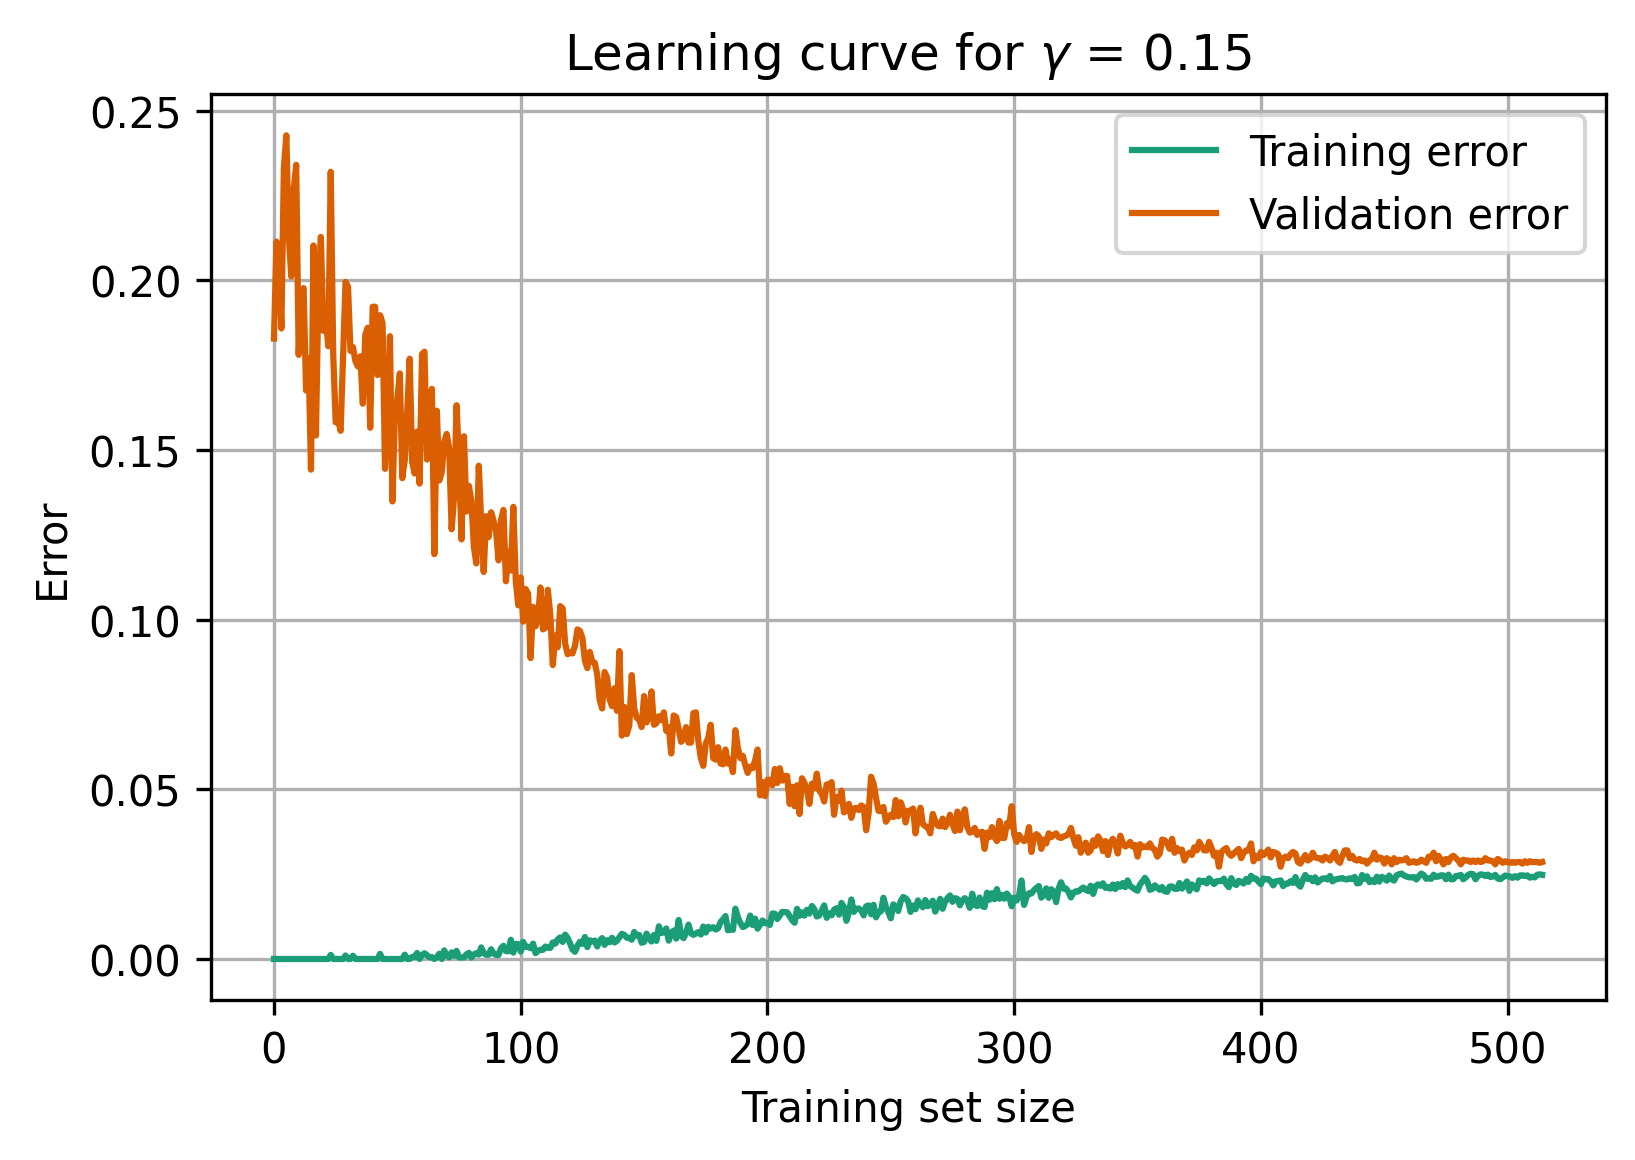

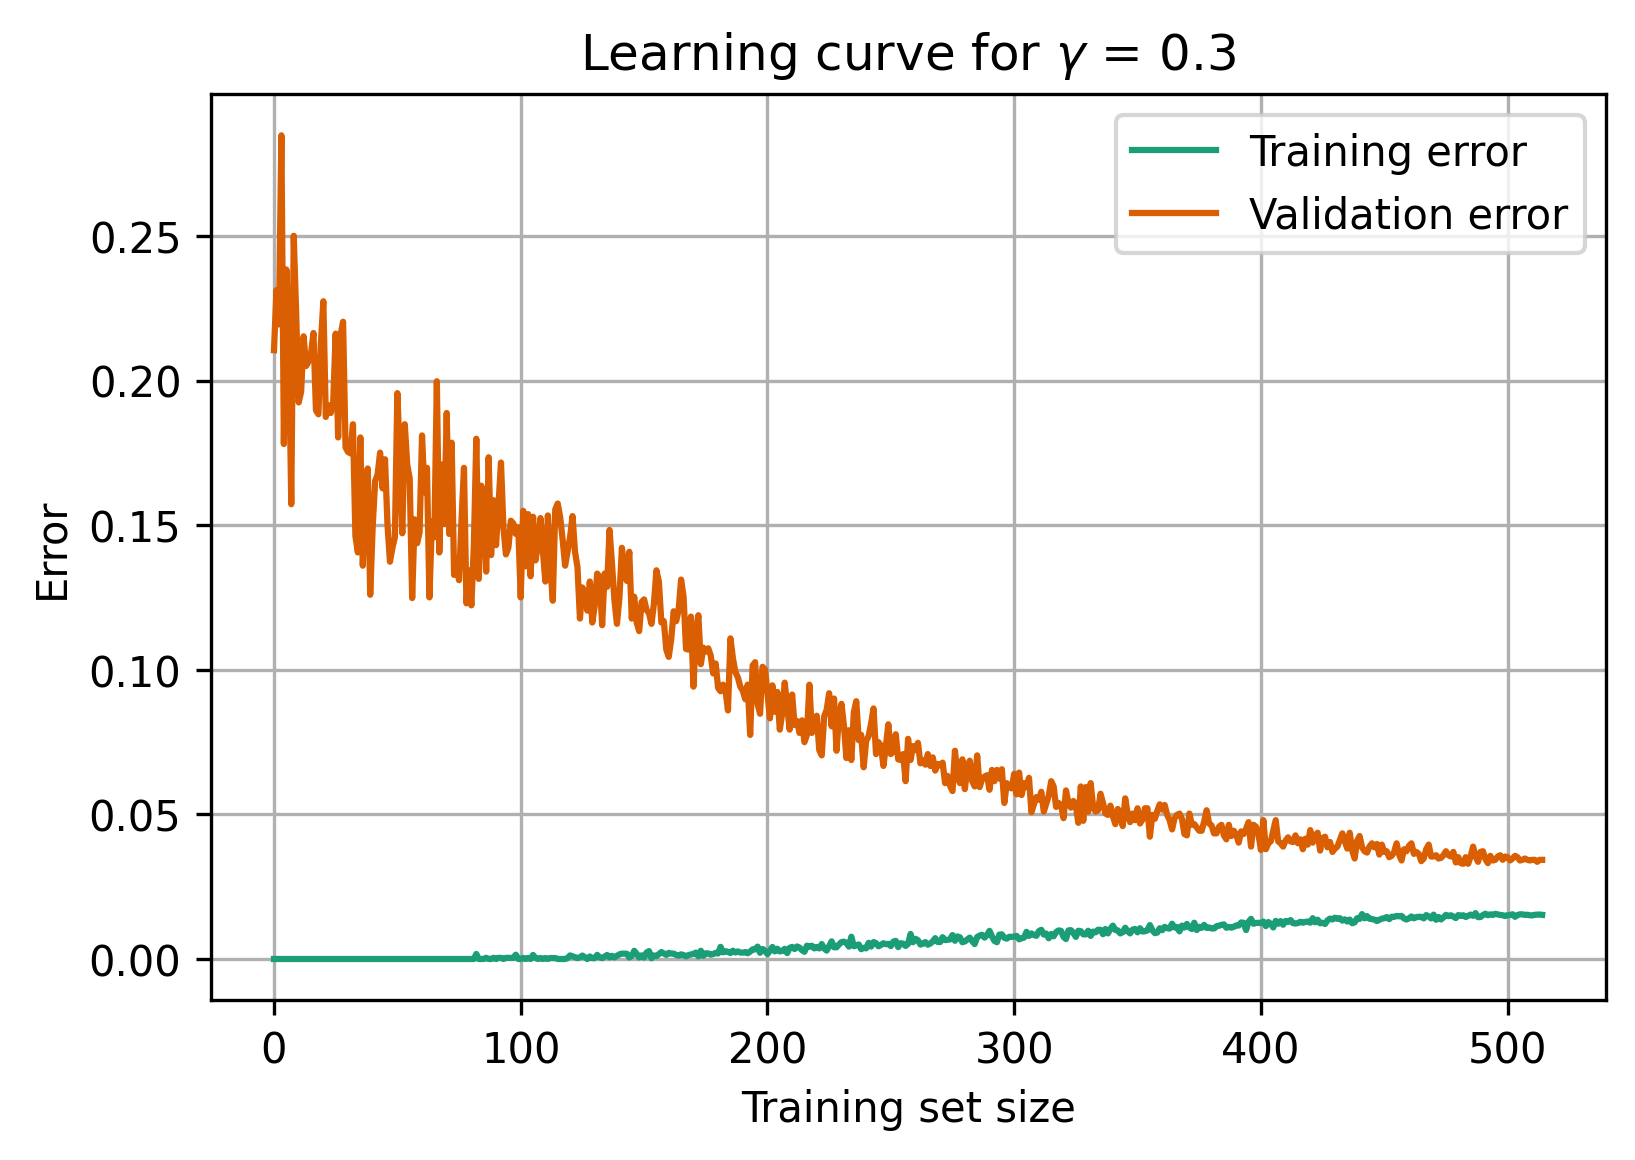

In [82]:
#set gamma
gamma = np.array([1e-4, 1e-3, 1e-2, 1e-1, 0.15, 0.3])

#plot the learning curves for all the gammas
for idx in range(len(gamma)):
    
    #set minimum training set size to avoid having only one sample class
    train_min = 10

    #initialize storage
    scores = np.empty((0,3))

    for i in range(0, len(train_data) - train_min):
        #set sums to 0
        sum_train = 0
        sum_test = 0

        #set number of repetitions for each training subset size
        repetitions = 25

        for j in range(repetitions):
            #permute training data before selecting subset   
            p = np.random.permutation(len(train_data))
            train_data = train_data[p]
            train_labels = train_labels[p]    

            #select subset of training data
            train_data_i = train_data[0:i + train_min]
            train_labels_i = train_labels[0:i + train_min]

            #set up classifier
            classifier_i = Kfda(kernel='rbf', n_components=1, gamma=gamma[idx])
            try:
                classifier_i.fit(train_data_i, train_labels_i)
            except:
                continue

            #record training and validation error and training set size
            sum_train += 1 - classifier_i.score(train_data_i, train_labels_i)
            sum_test += 1 - classifier_i.score(test_data, test_labels) 


        #calculate average
        sum_train /= repetitions
        sum_test /= repetitions

        #record training and validation error and training set size
        scores = np.vstack([scores, [sum_train, sum_test, i]])

    #plot learning curve
    plt.figure(3+2*idx, dpi=300)
    plt.grid()
    plt.xlabel('Training set size')
    plt.ylabel('Error')
    plt.plot(scores[:,2], scores[:,0], color='#1b9e77')
    plt.plot(scores[:,2], scores[:,1], color='#d95f02')
    plt.legend(['Training error', 'Validation error'])
    plt.title("Learning curve for $\gamma$ = " + str(gamma[idx]))
    plt.show()
    
    #plot only values larger than 300
    if False:
        plt.figure(3+2*idx+1, dpi=300)
        plt.grid()
        plt.xlabel('Training set size')
        plt.ylabel('Error')
        plt.plot(scores[300:,2], scores[300:,0], color='#1b9e77')
        plt.plot(scores[300:,2], scores[300:,1], color='#d95f02')
        plt.legend(['Training error', 'Validation error'])
        plt.title("Learning Curve for larger training set sizes for $\gamma$ = " + str(gamma[idx]))
        plt.show()

Looking at the different learning curves shows how the $\gamma$-factor is relevant to make sure the model does not over- or underfit the training data. Going forward, $\gamma$ will be set to 0.1 as for this value the training and validation error converge to around 3%. For $\gamma = 0.0001$ the model underfits the data as the training error remains high. For $\gamma = 0.001$ and $\gamma=0.01$, the model overfits less, but the training error still remain higher than for $\gamma=0.1$. In both cases increasing the training set size doesn't lead to a reduction of validation error, meaning the hypothesis class is exhausted and one should change it. For $\gamma = 0.1$ and for $\gamma = 0.3$ the model overfits the data, leading to a very low training error but a much higher validation error because it focuses too much on the outlier in the training data.

In [19]:
#samples to predict labels
samples = np.array([[0,1],[2,3],[7,0]])

#train classifier for gamma=0.15
classifier_final = Kfda(kernel='rbf', n_components=1, gamma=0.15)
classifier_final.fit(train_data, train_labels)
print("Score of training data:", classifier_final.score(train_data, train_labels))
print("Score of testing data: ", classifier_final.score(test_data, test_labels))

#classify sampels
predicitions = classifier_final.predict(samples)
print("Predictions: ", predicitions)

Score of training data: 0.9752380952380952
Score of testing data:  0.9714285714285714
Predictions:  [False False False]


The classifier predicts the label 0 for all three samples.

# 5 In the projected space

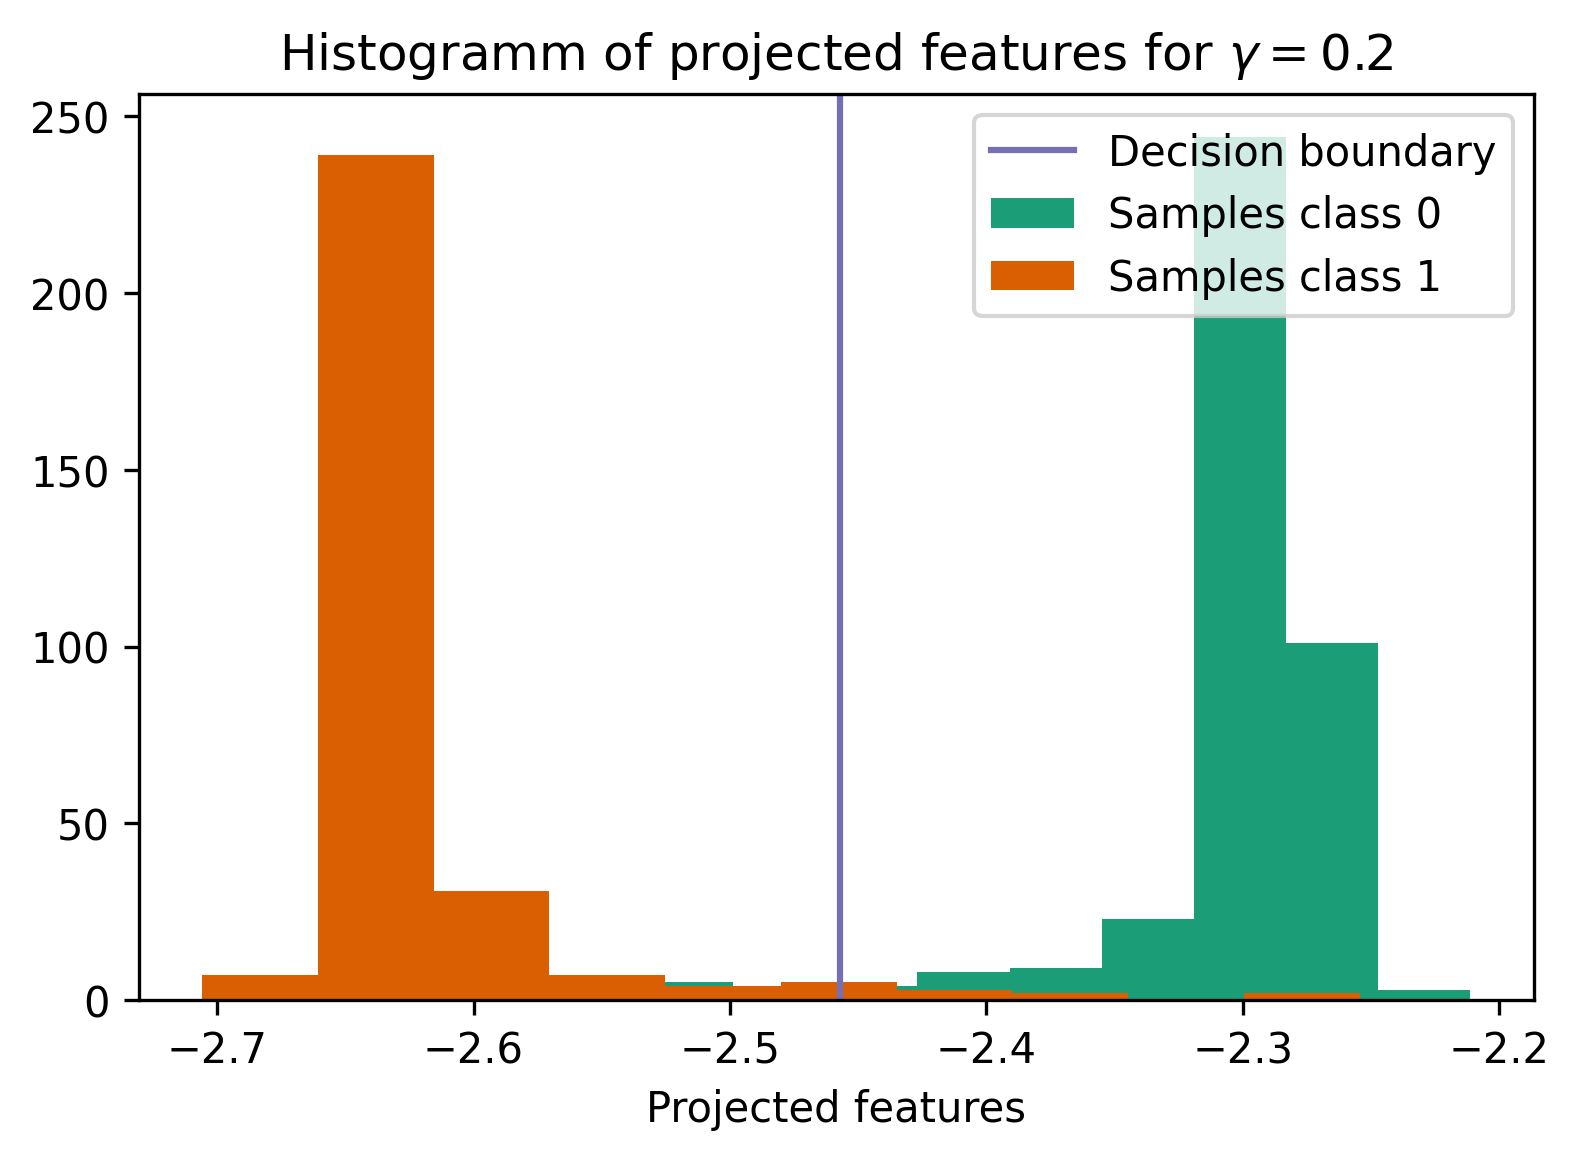

In [23]:
#project original features
projected = classifier.transform(features)

#create histogramm
plt.figure(501, dpi=300)
plt.hist(projected[~labels], color='#1b9e77')
plt.hist(projected[labels], color='#d95f02')
plt.axvline(avg_means(projected,labels), color='#7570b3')
plt.xlabel('Projected features')
plt.legend(['Decision boundary', 'Samples class 0', 'Samples class 1'])
plt.title("Histogramm of projected features for $\gamma=0.2$")
plt.show()

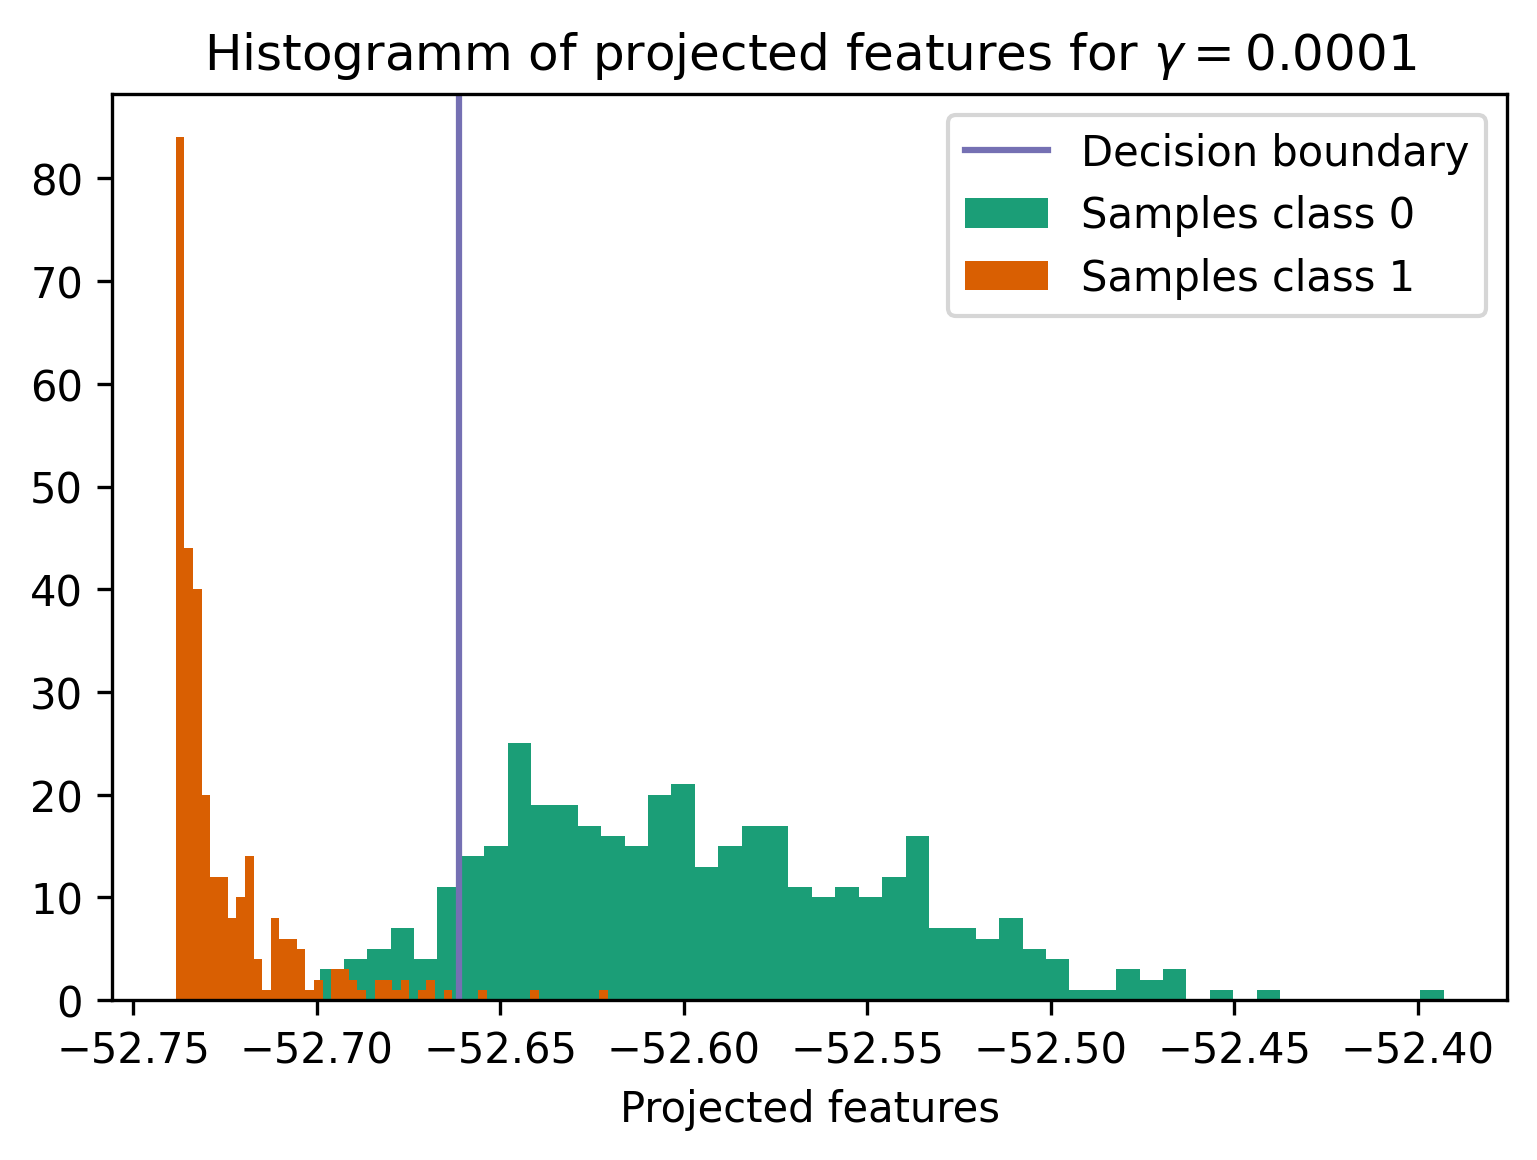

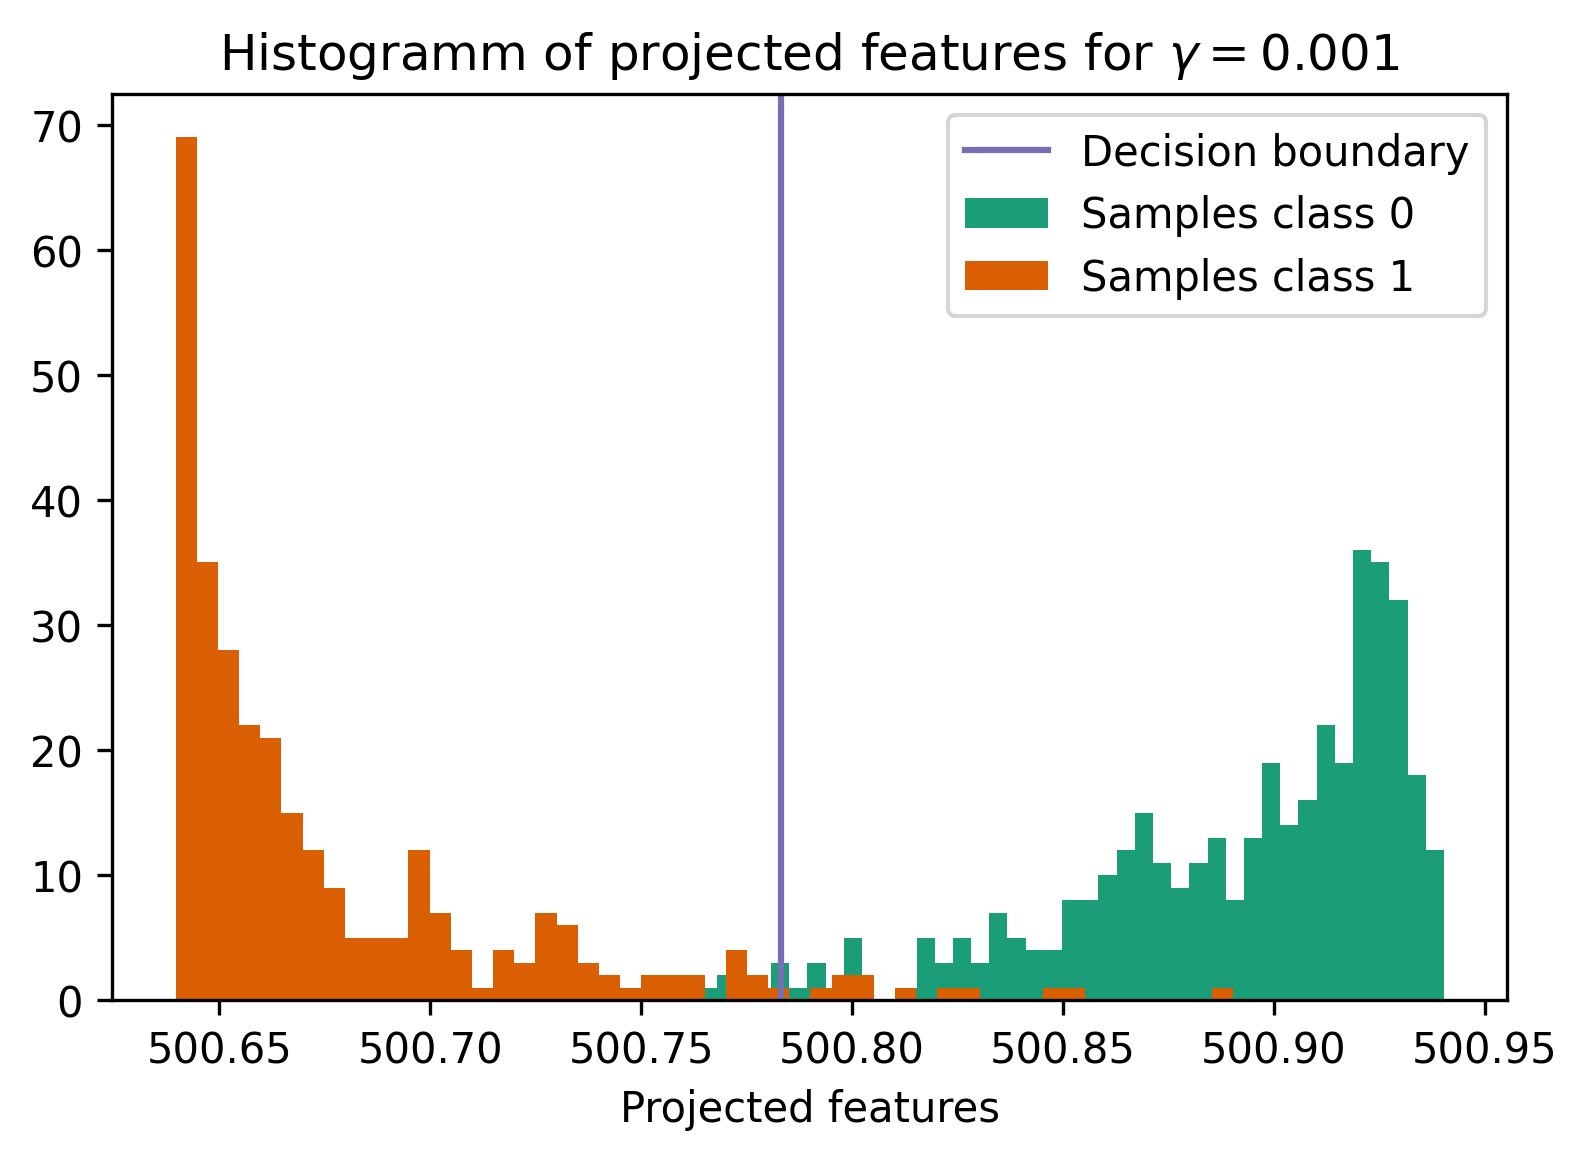

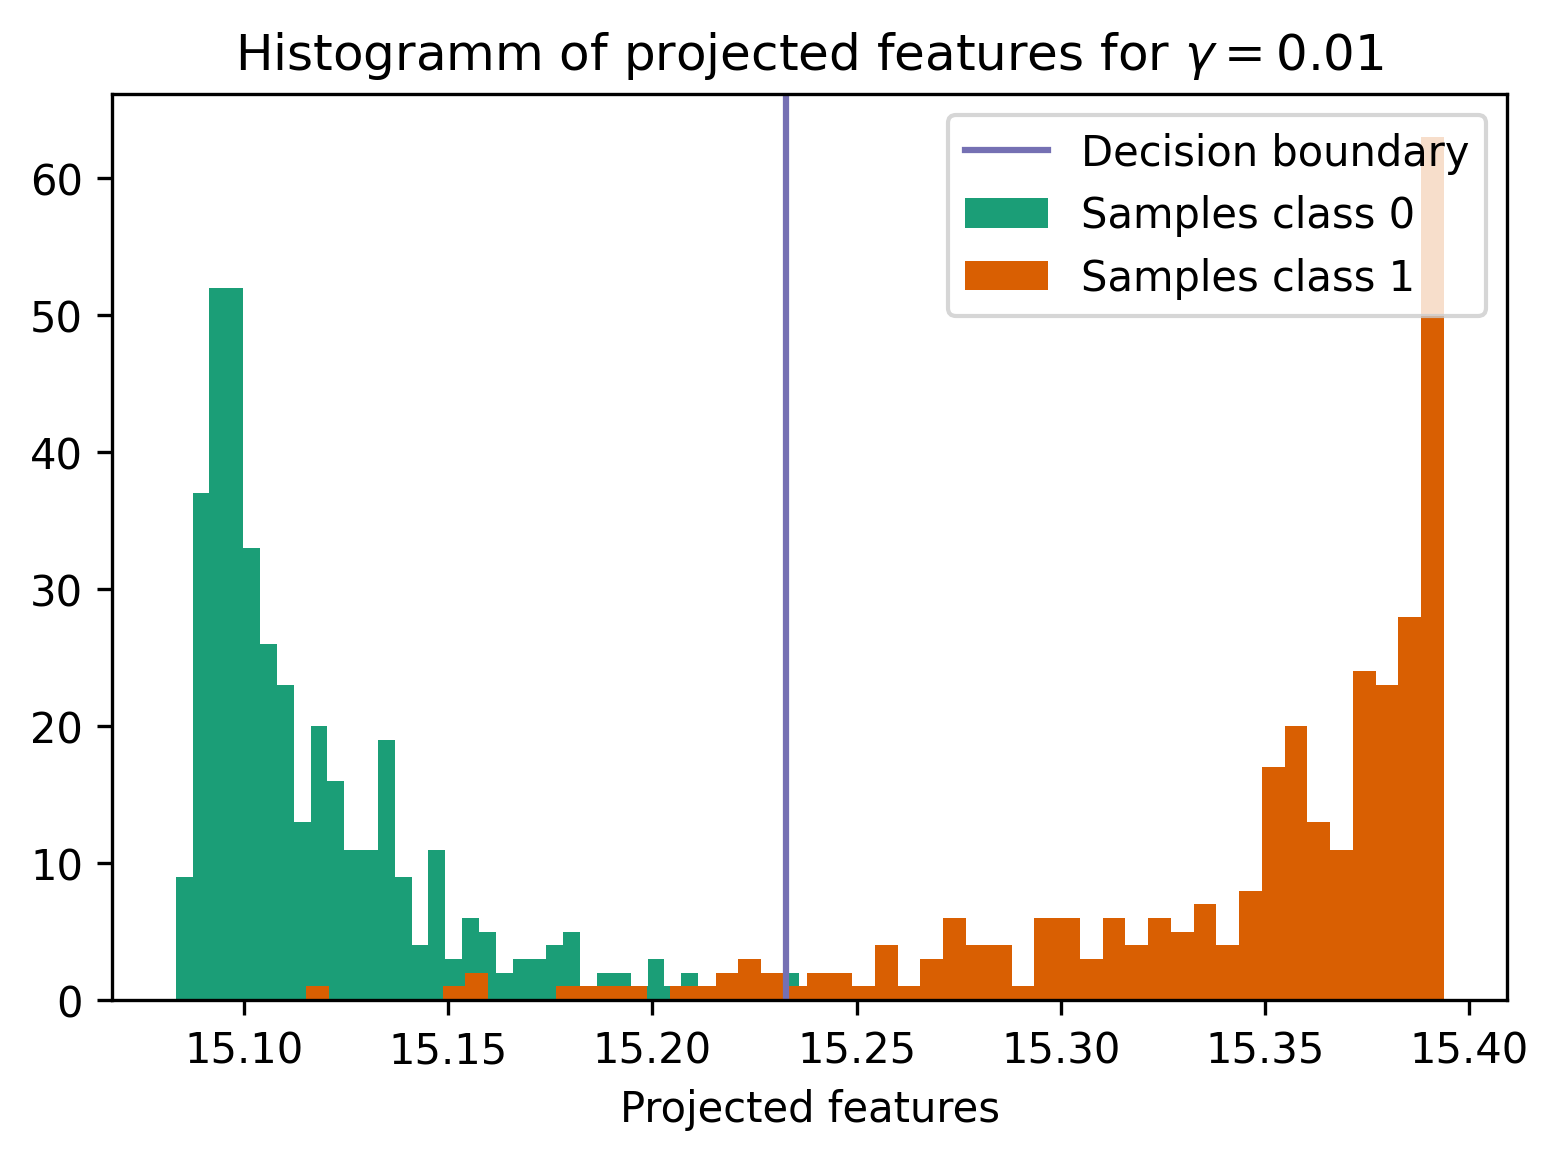

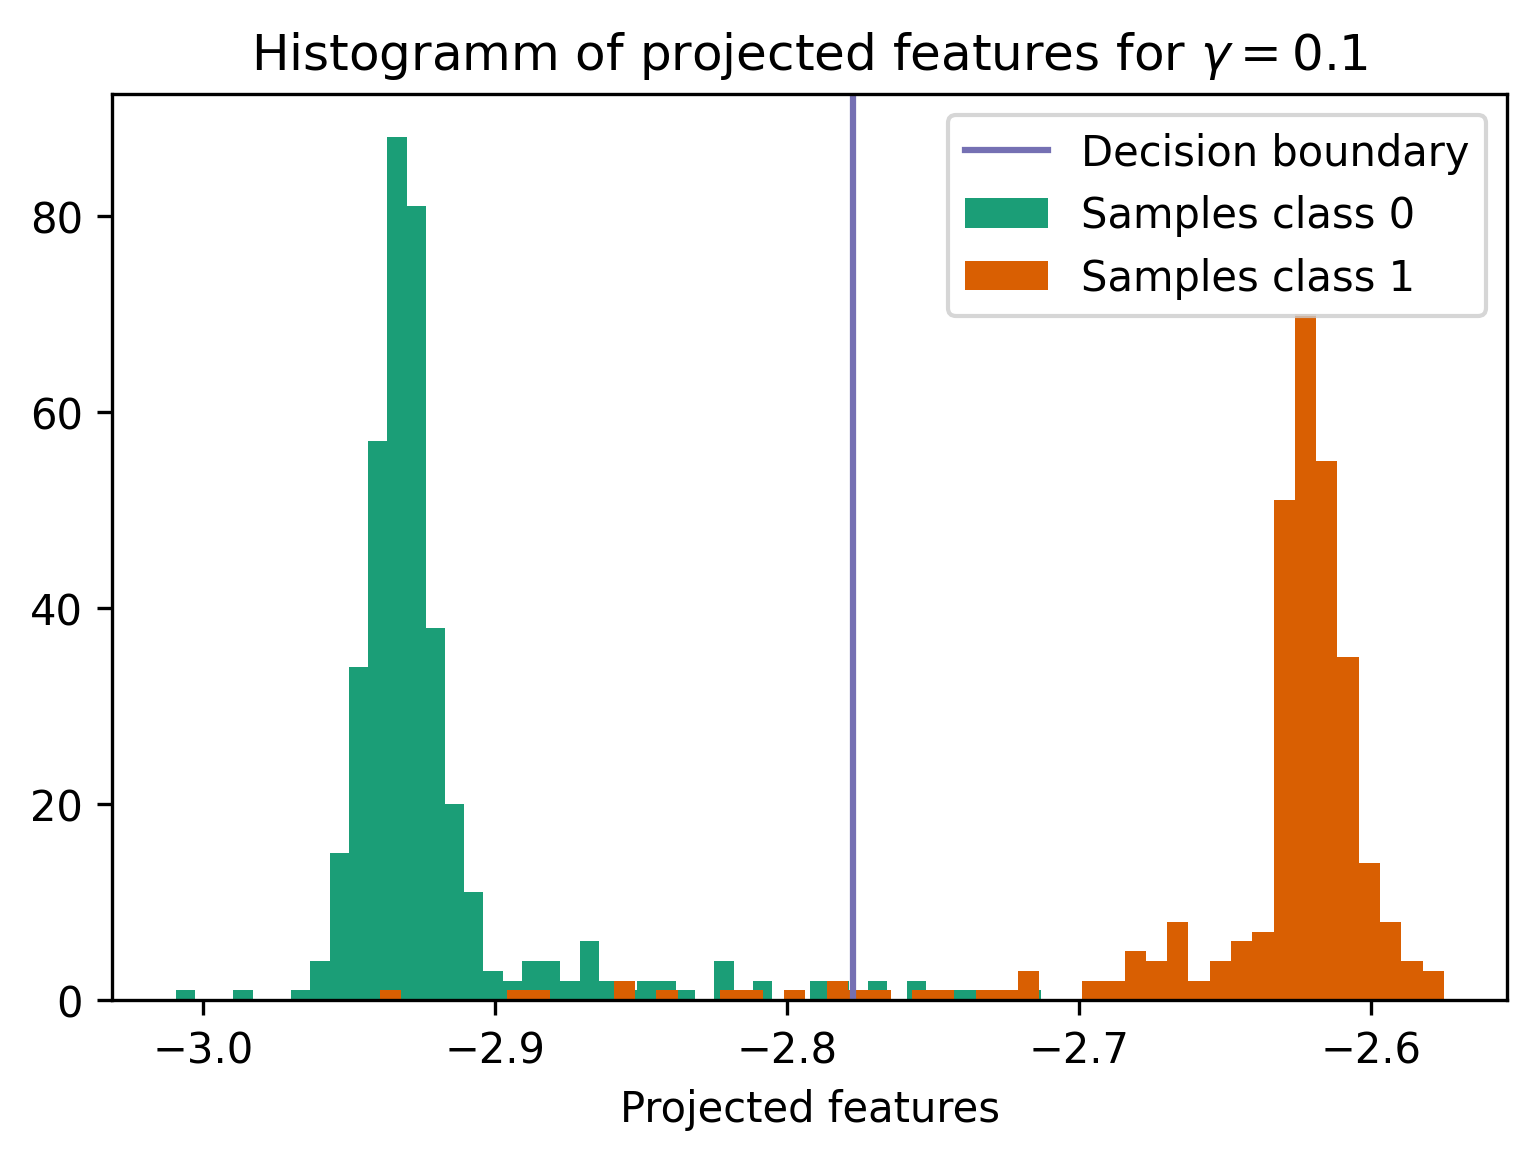

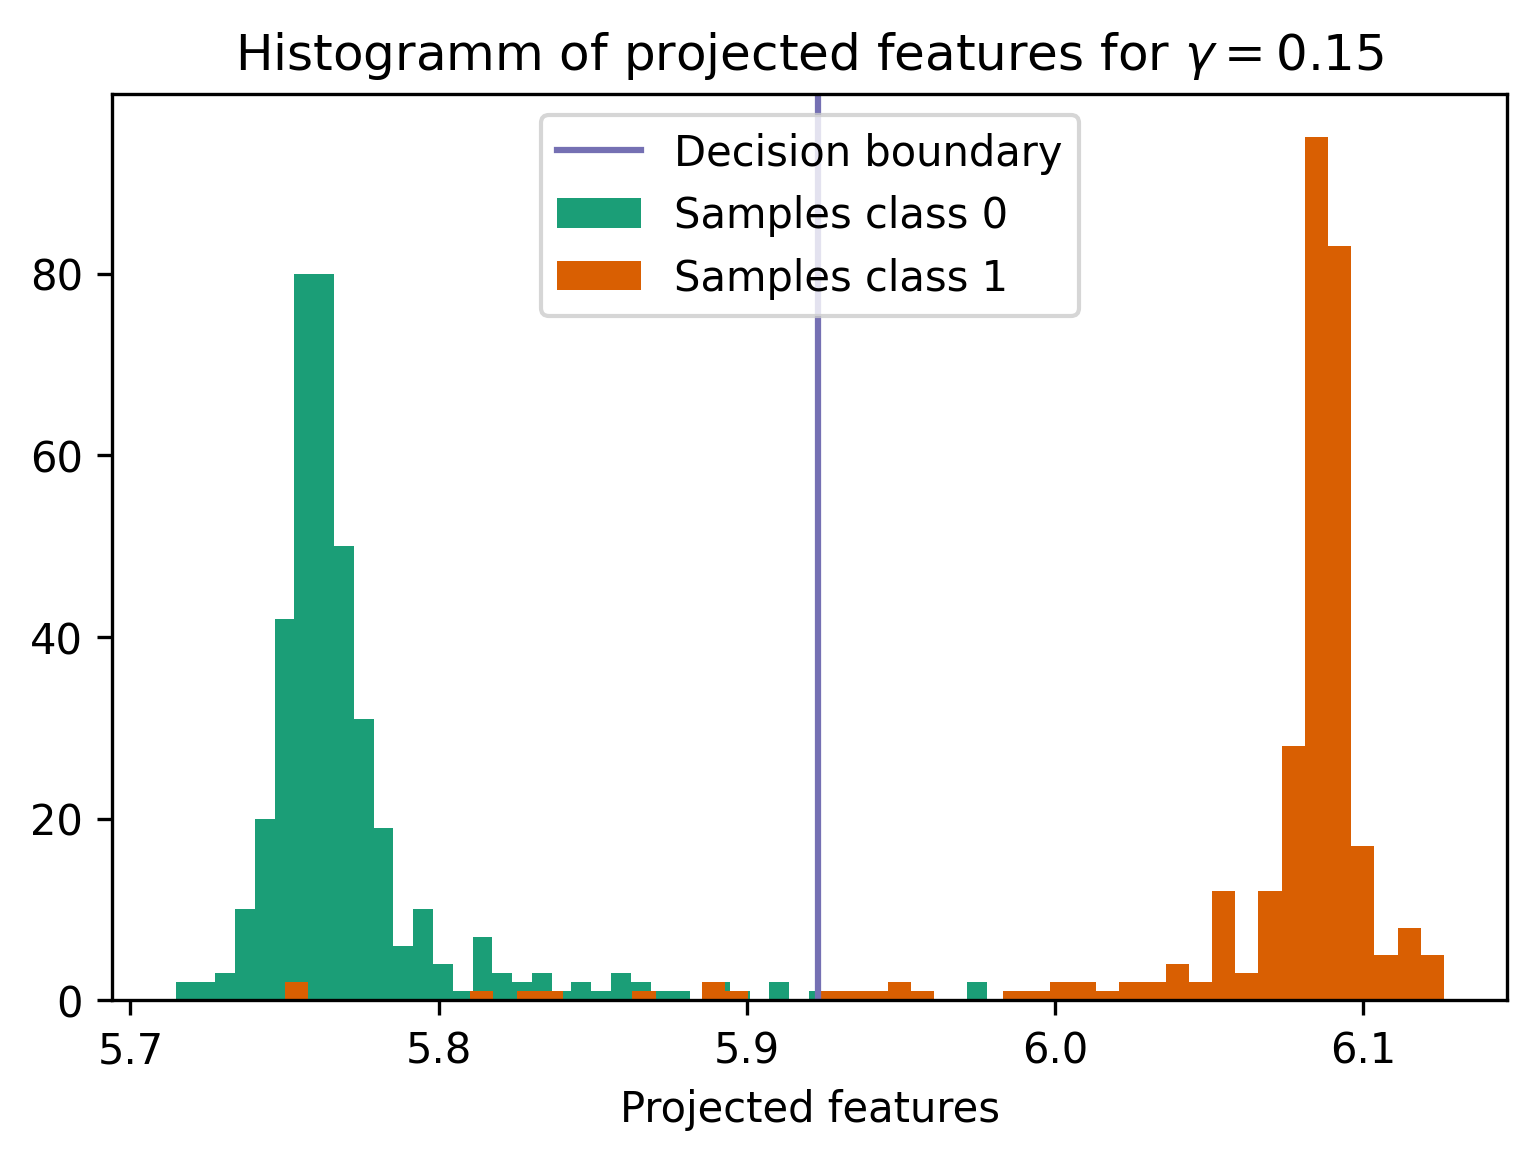

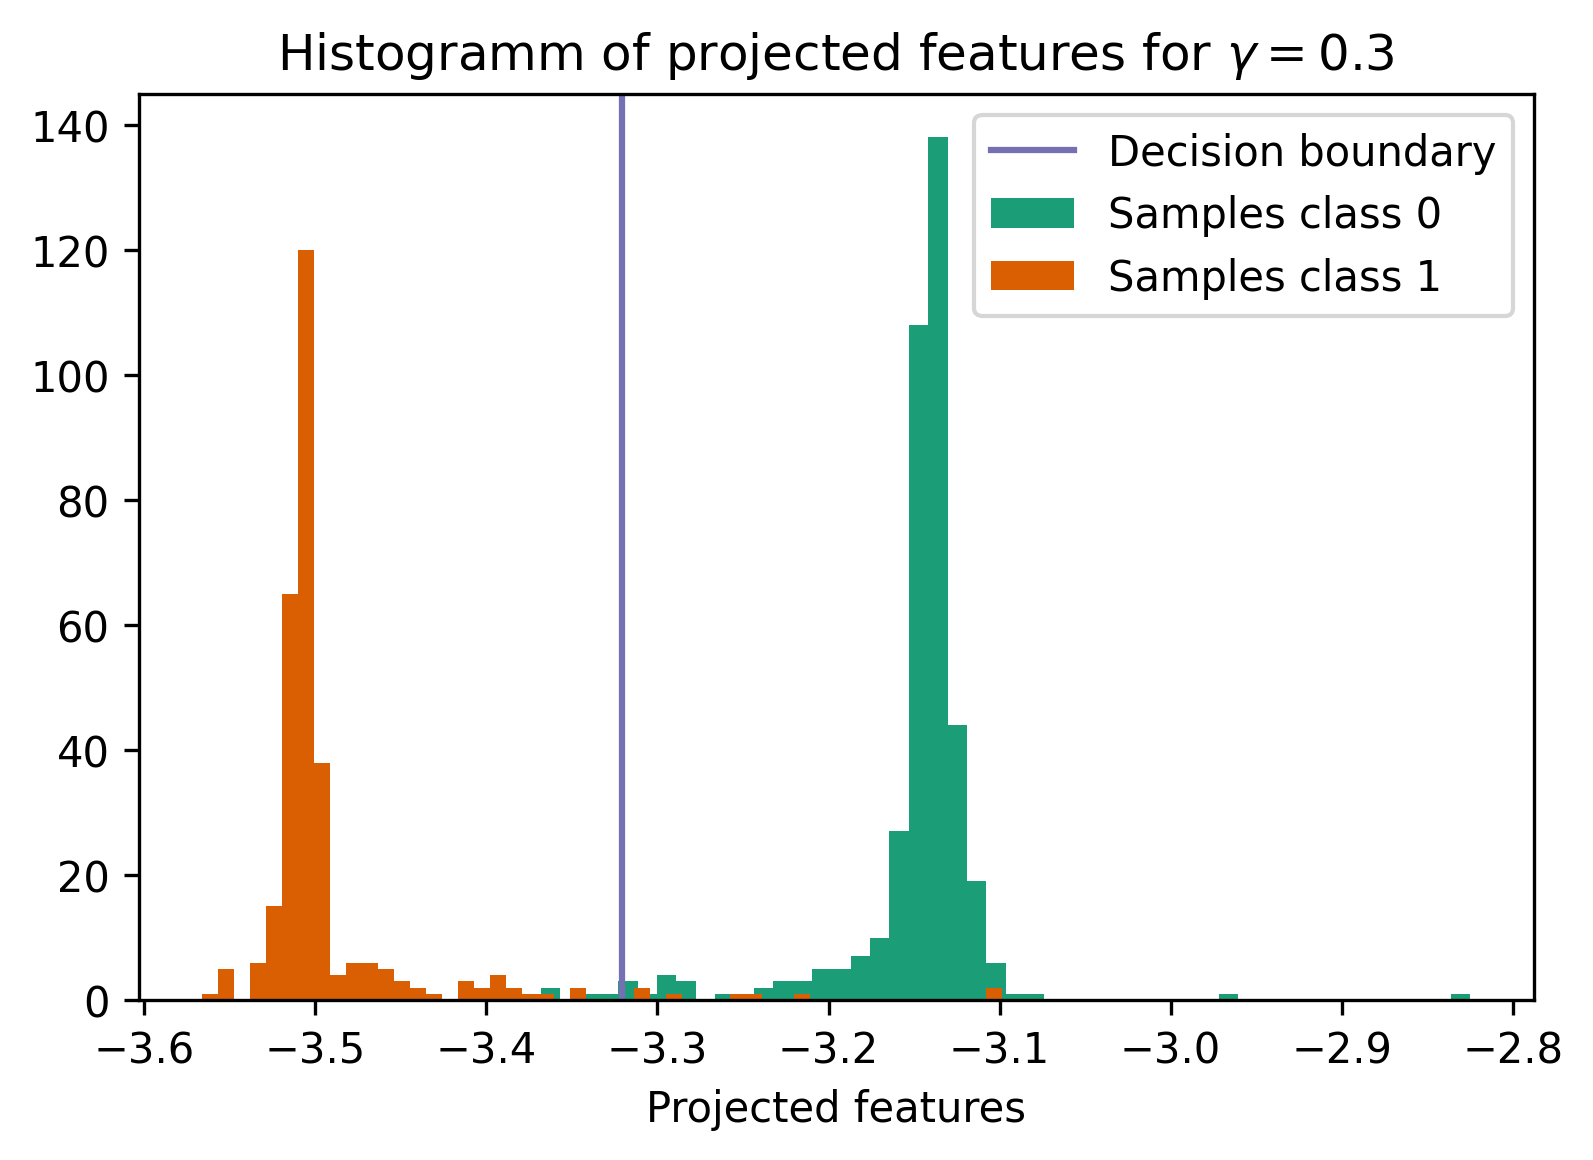

In [24]:
#plot histogramms for all the gammas
for idx in range(len(gamma)):
    classifier_i = Kfda(kernel='rbf', n_components=1, gamma=gamma[idx])
    classifier_i.fit(train_data, train_labels)
    
    #project original features
    projected_i = classifier_i.transform(features)
    
    #create histogramm
    plt.figure(502 + idx, dpi=300)
    plt.hist(projected_i[~labels],50, color='#1b9e77')
    plt.hist(projected_i[labels], 50,color='#d95f02')
    plt.axvline(avg_means(projected_i,labels), color='#7570b3')
    plt.xlabel('Projected features')
    plt.legend(['Decision boundary', 'Samples class 0', 'Samples class 1'])
    plt.title("Histogramm of projected features for $\gamma=$" + str(gamma[idx]))
    plt.show()  

Increasing $\gamma$ pushes the outlier further away from the main cluster of the data. Hence the historgrams seem to get more concentrated. As we are considering a RBF kernel, increasing $\gamma$ means decreasing the similarity between two points. Hence, the classifier becomes more relaxed and may project features to a wider range of values.

In [12]:
#define separation_Ratio function
def separation_ratio(projected_data, labels):
    #separate data according to labels
    data_0 = projected_data[~labels]
    data_1 = projected_data[labels]
    
    #calculate mean difference
    d = np.mean(data_0) - np.mean(data_1)
    
    #calculate sum of variances
    s = np.var(data_0) + np.var(data_1)
    
    #caluclate ratio
    return np.power(d,2)/s

#set gamma
gamma = np.array([1e-4, 1e-3, 1e-2, 1e-1, 0.15, 0.3])

#calculate separation ratios
print("Separation ratios")
for idx in range(len(gamma)):
    #train classifier for gamma
    classifier_i = Kfda(kernel='rbf', n_components=1, gamma=gamma[idx])
    classifier_i.fit(train_data, train_labels)
    
    #project original features
    projected_i = classifier_i.transform(features)
    
    #get separation ratio
    ratio = separation_ratio(projected_i, labels)
    
    #print separation ratio
    print("for gamma=" + str(gamma[idx]) + " is " + str(ratio))

Separation ratios
for gamma=0.0001 is 5.221928546594546
for gamma=0.001 is 12.309132729531475
for gamma=0.01 is 12.751630700049066
for gamma=0.1 is 19.822998431516638
for gamma=0.15 is 20.92507266667788
for gamma=0.3 is 22.699612629592647


# 6 The decision boundary

In [3]:
#returns the average means of two projeted feature classes
def avg_means(projected_data, labels):
    #separate data according to labels
    data_0 = projected_data[~labels]
    data_1 = projected_data[labels]
    
    #calculate average mean
    return (np.mean(data_0) + np.mean(data_1))/2

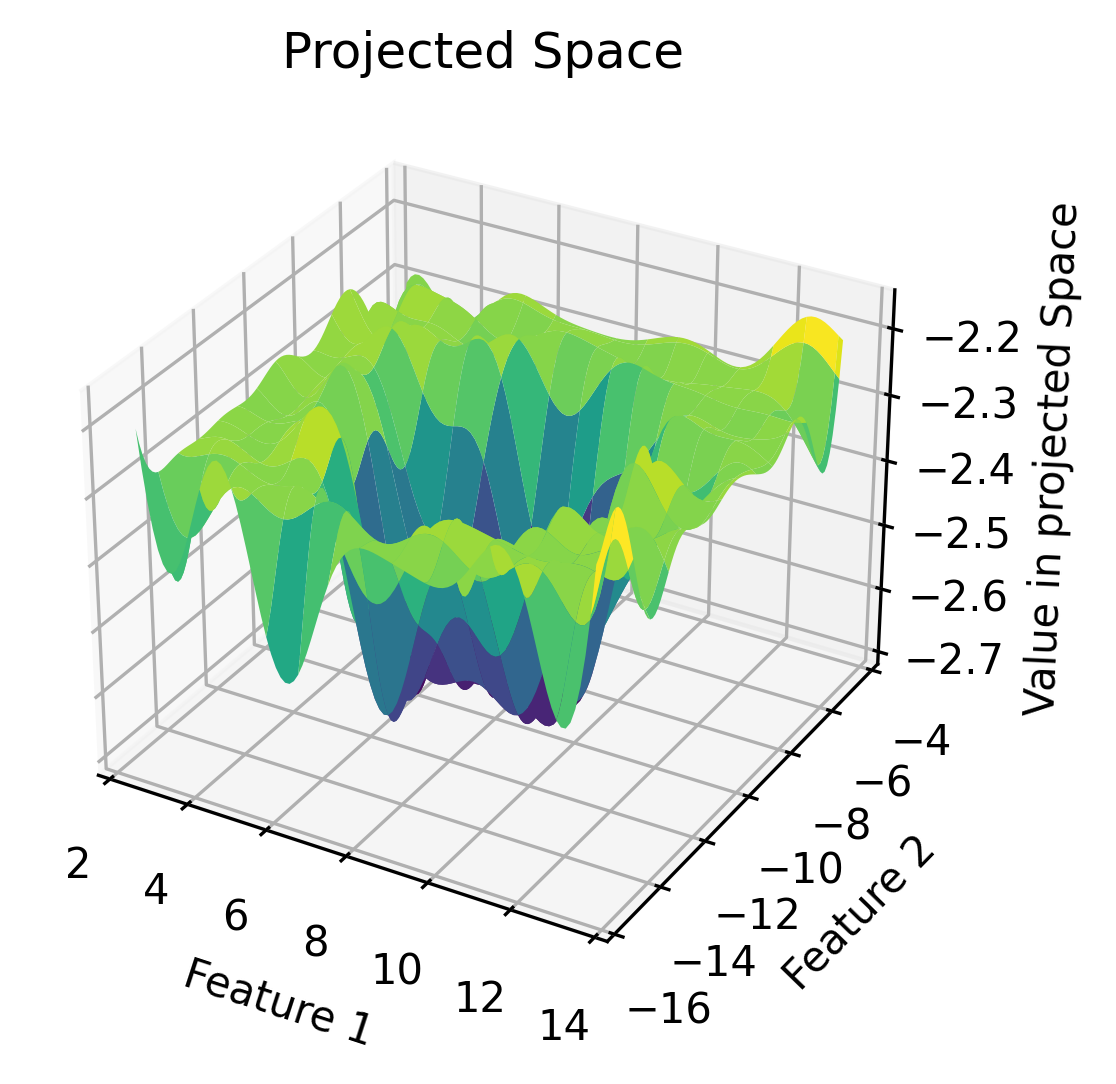

In [25]:
#create meshgrid
x = np.linspace(2.5, 13.5, 100, endpoint=True)
y = np.linspace(-15.5, -4.5, 100, endpoint=True)
xv, yv = np.meshgrid(x,y)

#reshape meshgrid
grid = np.array([np.reshape(xv, xv.size, order='F'),np.reshape(yv, yv.size, order='F')])
grid = np.transpose(grid)

#transform grid
z = classifier.transform(grid)

z = z.reshape(xv.shape)

#plot 
plt.figure(6, dpi=300)
ax = plt.axes(projection='3d')
#ax.plot_surface(grid[:,0], grid[:,1], z)
ax.plot_surface(xv, yv, z, rstride=7, cstride=7, cmap="viridis")
ax.set_title("Projected Space")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Value in projected Space')
plt.show()

The plot shows how the model chooses some lower value for class 0 and a higher values for class 1. It reflects the roundness of the border between the two classes.

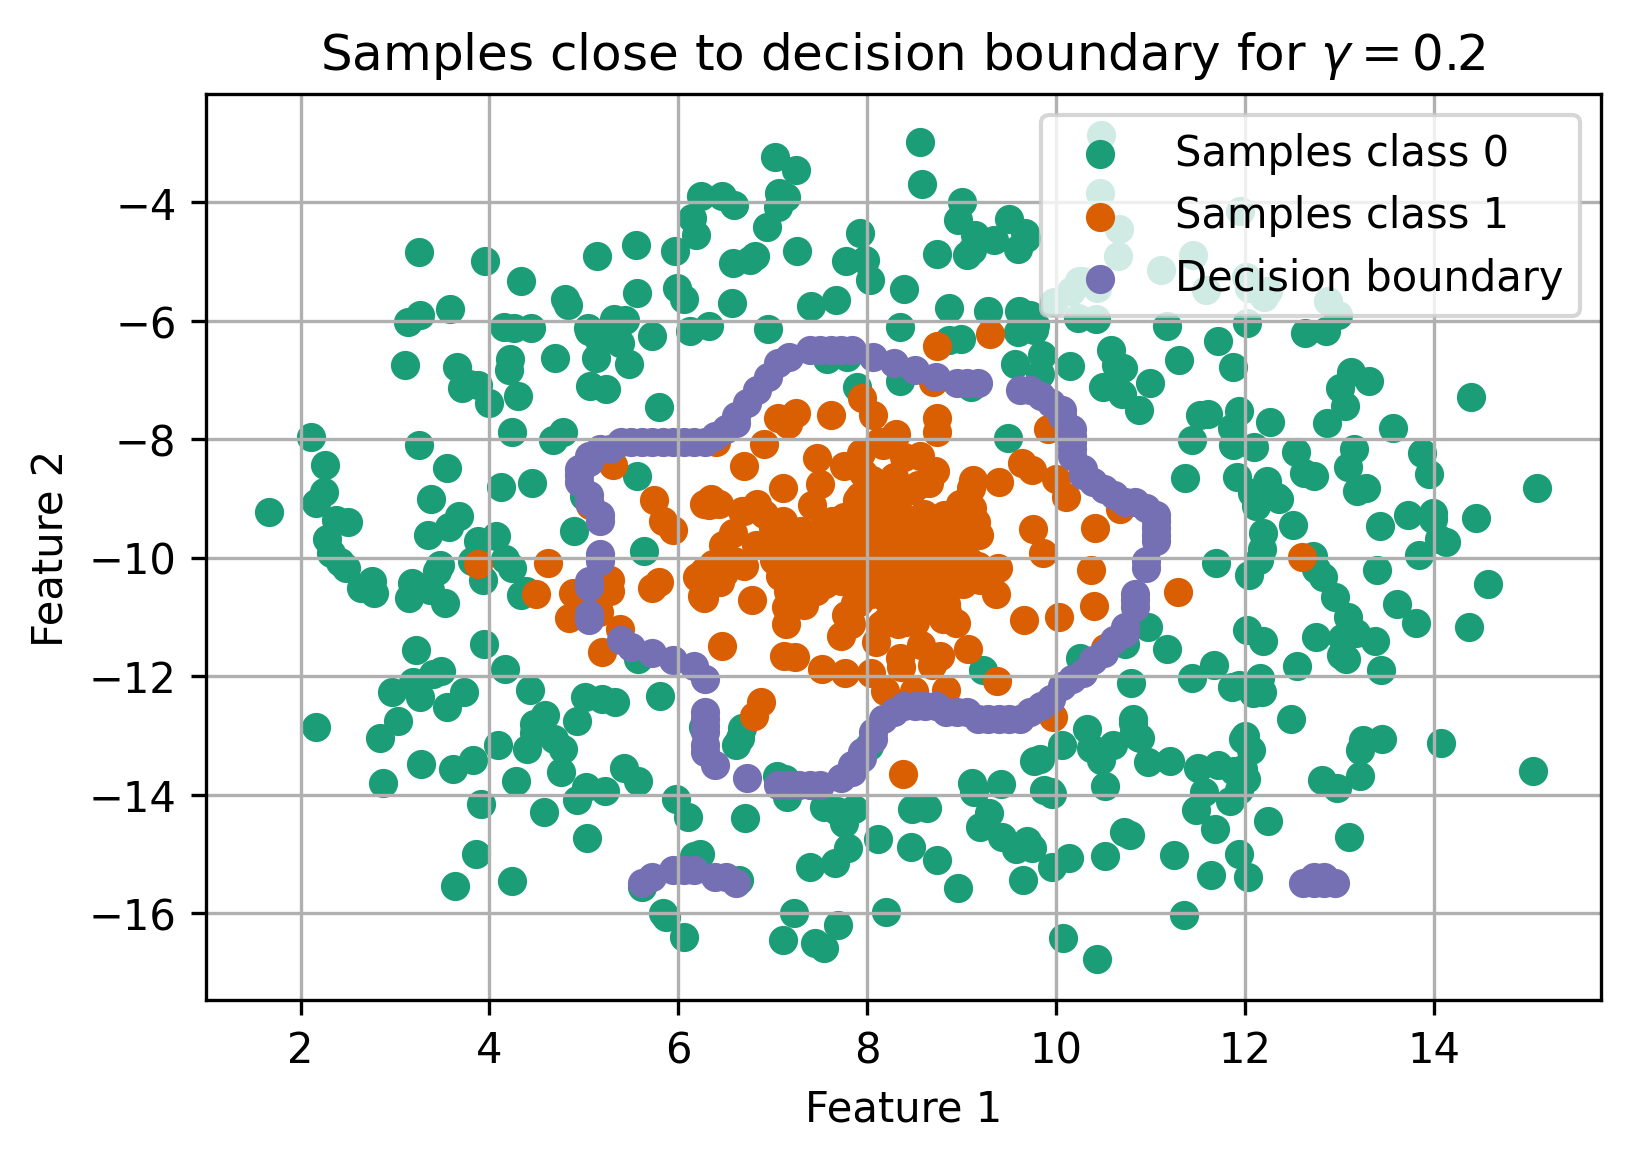

In [26]:
#set threshold
tau = 0.01

#set desicion boundary
mu = avg_means(projected,labels)

#generate scatterplot
plt.figure(601, dpi=300)
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(features[~labels,0], features[~labels,1], color='#1b9e77')
plt.scatter(features[labels,0], features[labels,1], color='#d95f02')
plt.scatter(xv[np.abs(z-mu)<tau], yv[np.abs(z-mu)<tau], color='#7570b3')
plt.legend(['Samples class 0', 'Samples class 1', 'Decision boundary'])
plt.title("Samples close to decision boundary for $\gamma= 0.2$")
plt.show()

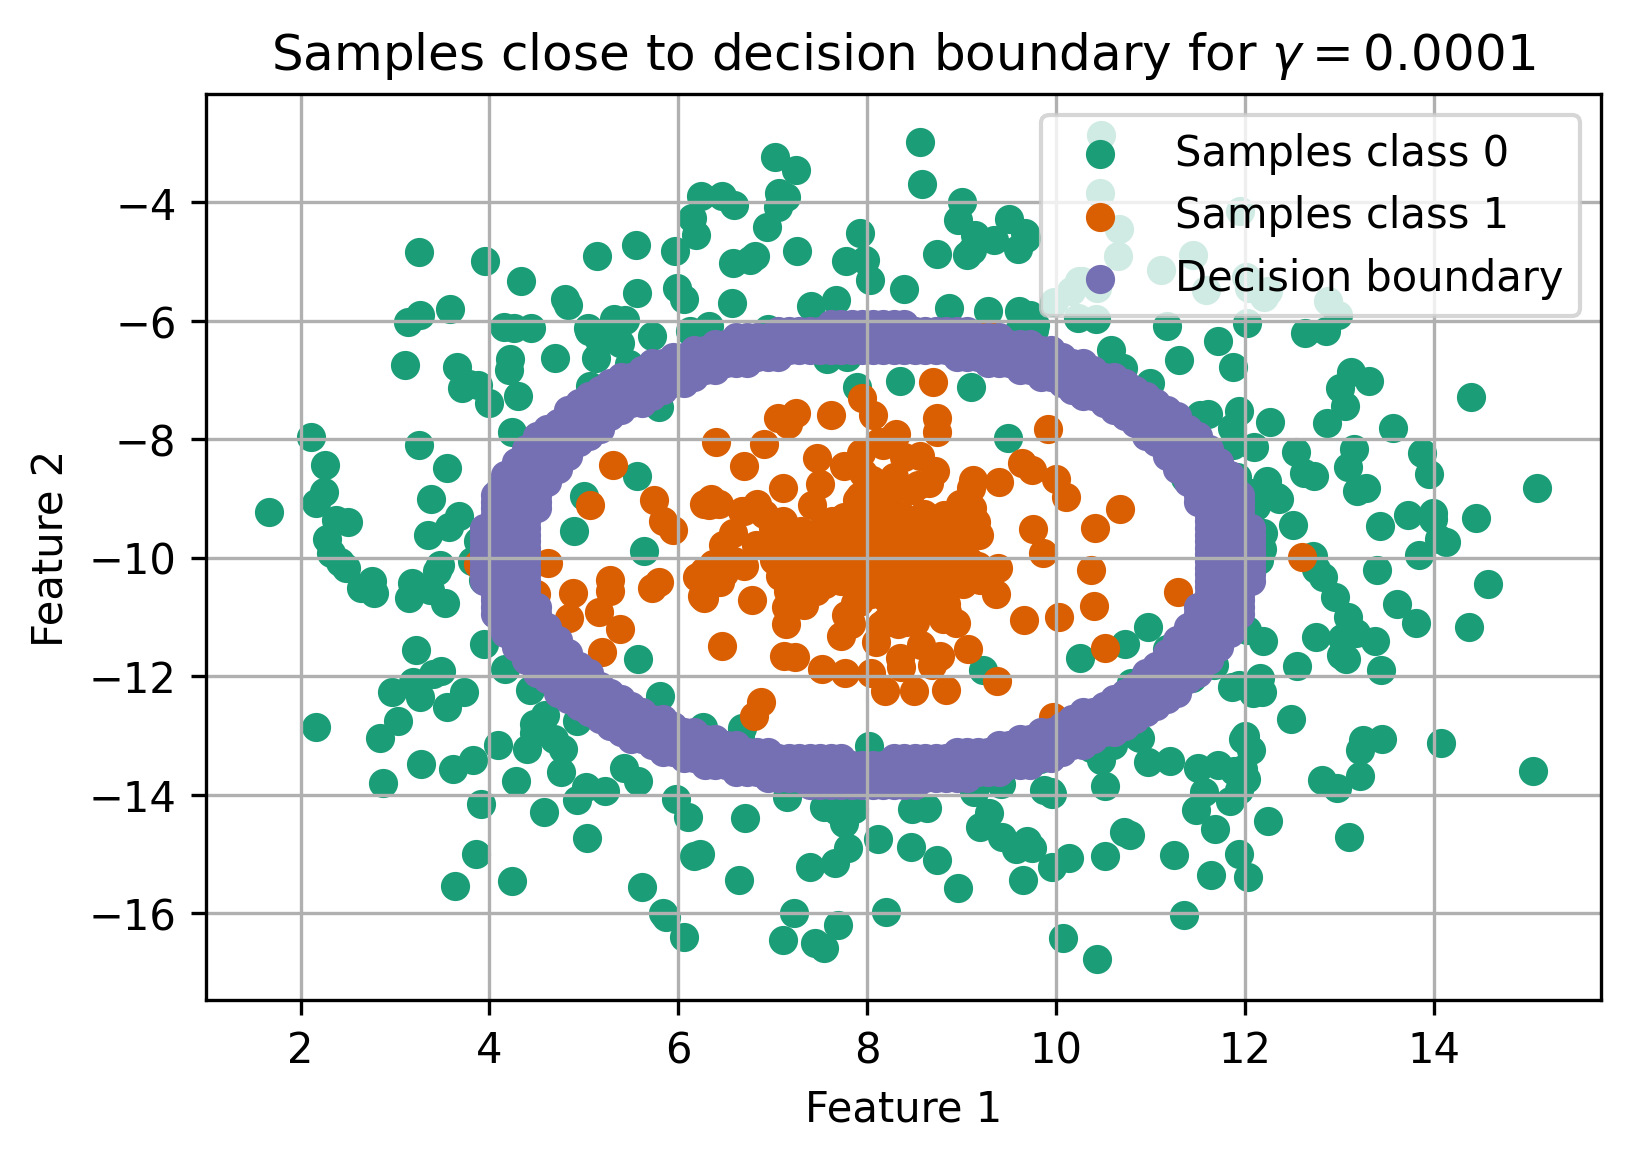

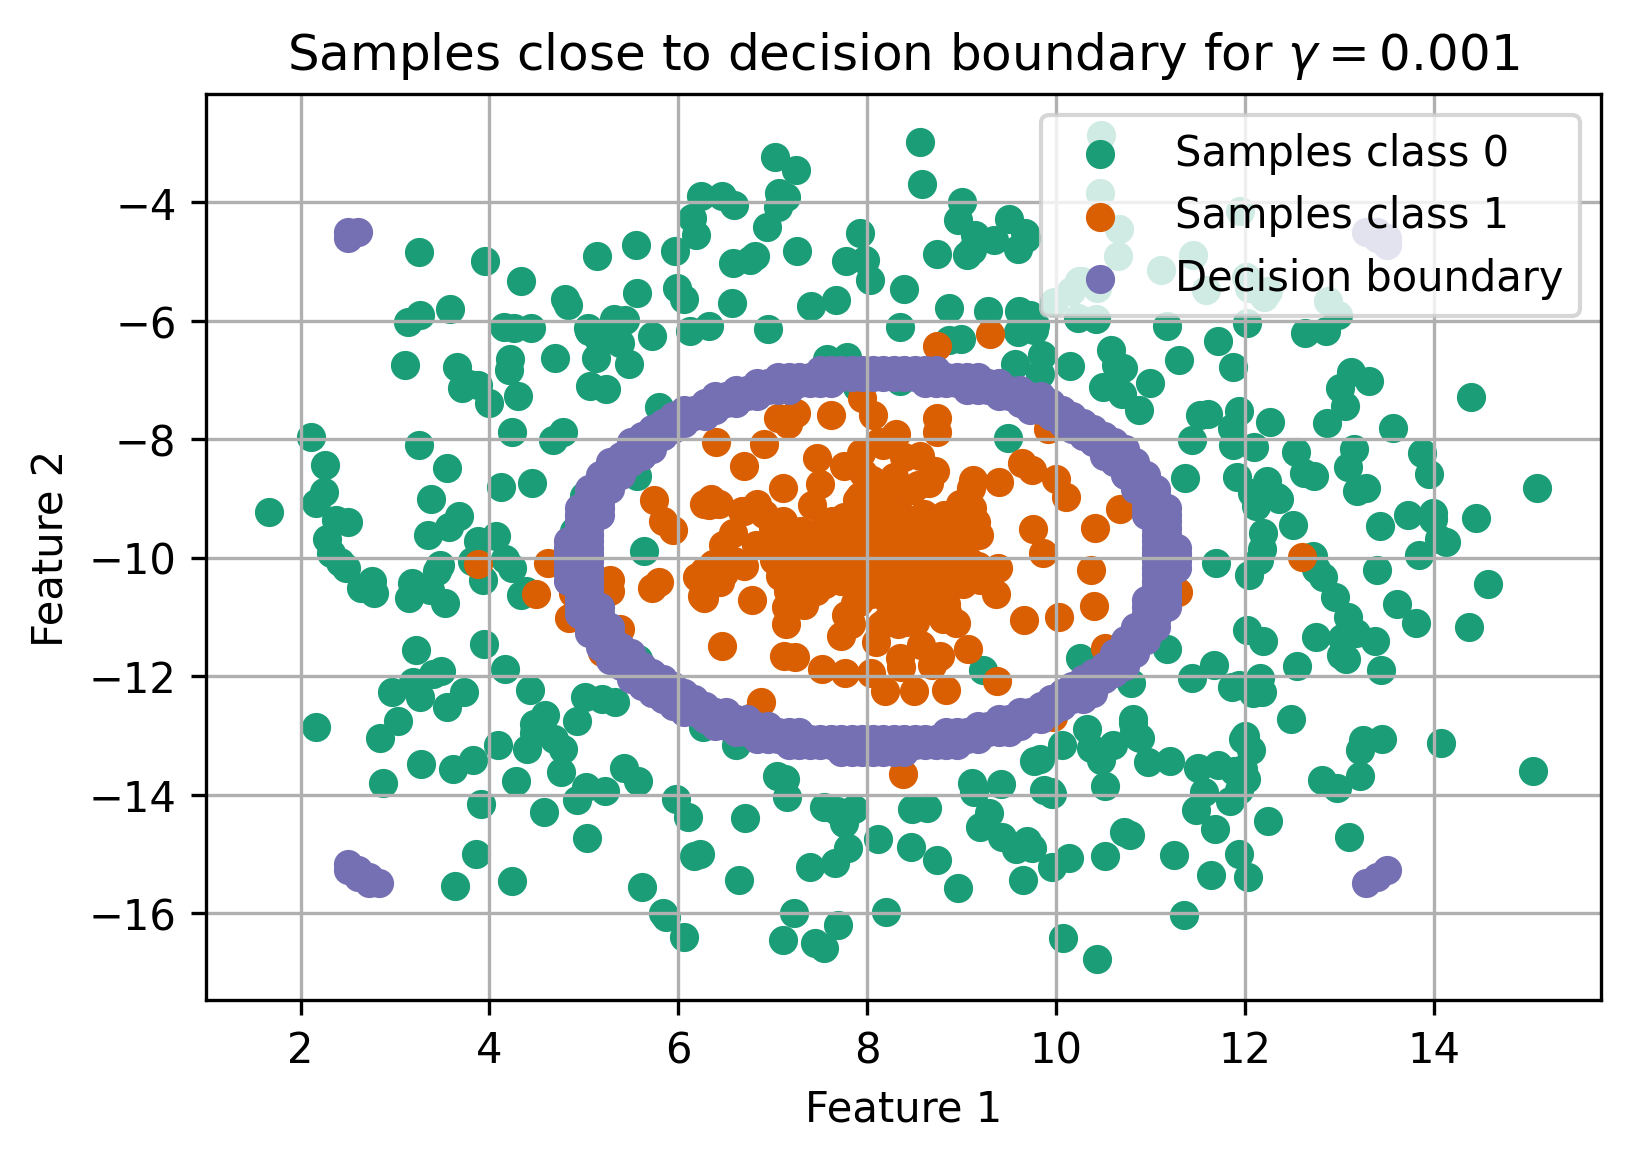

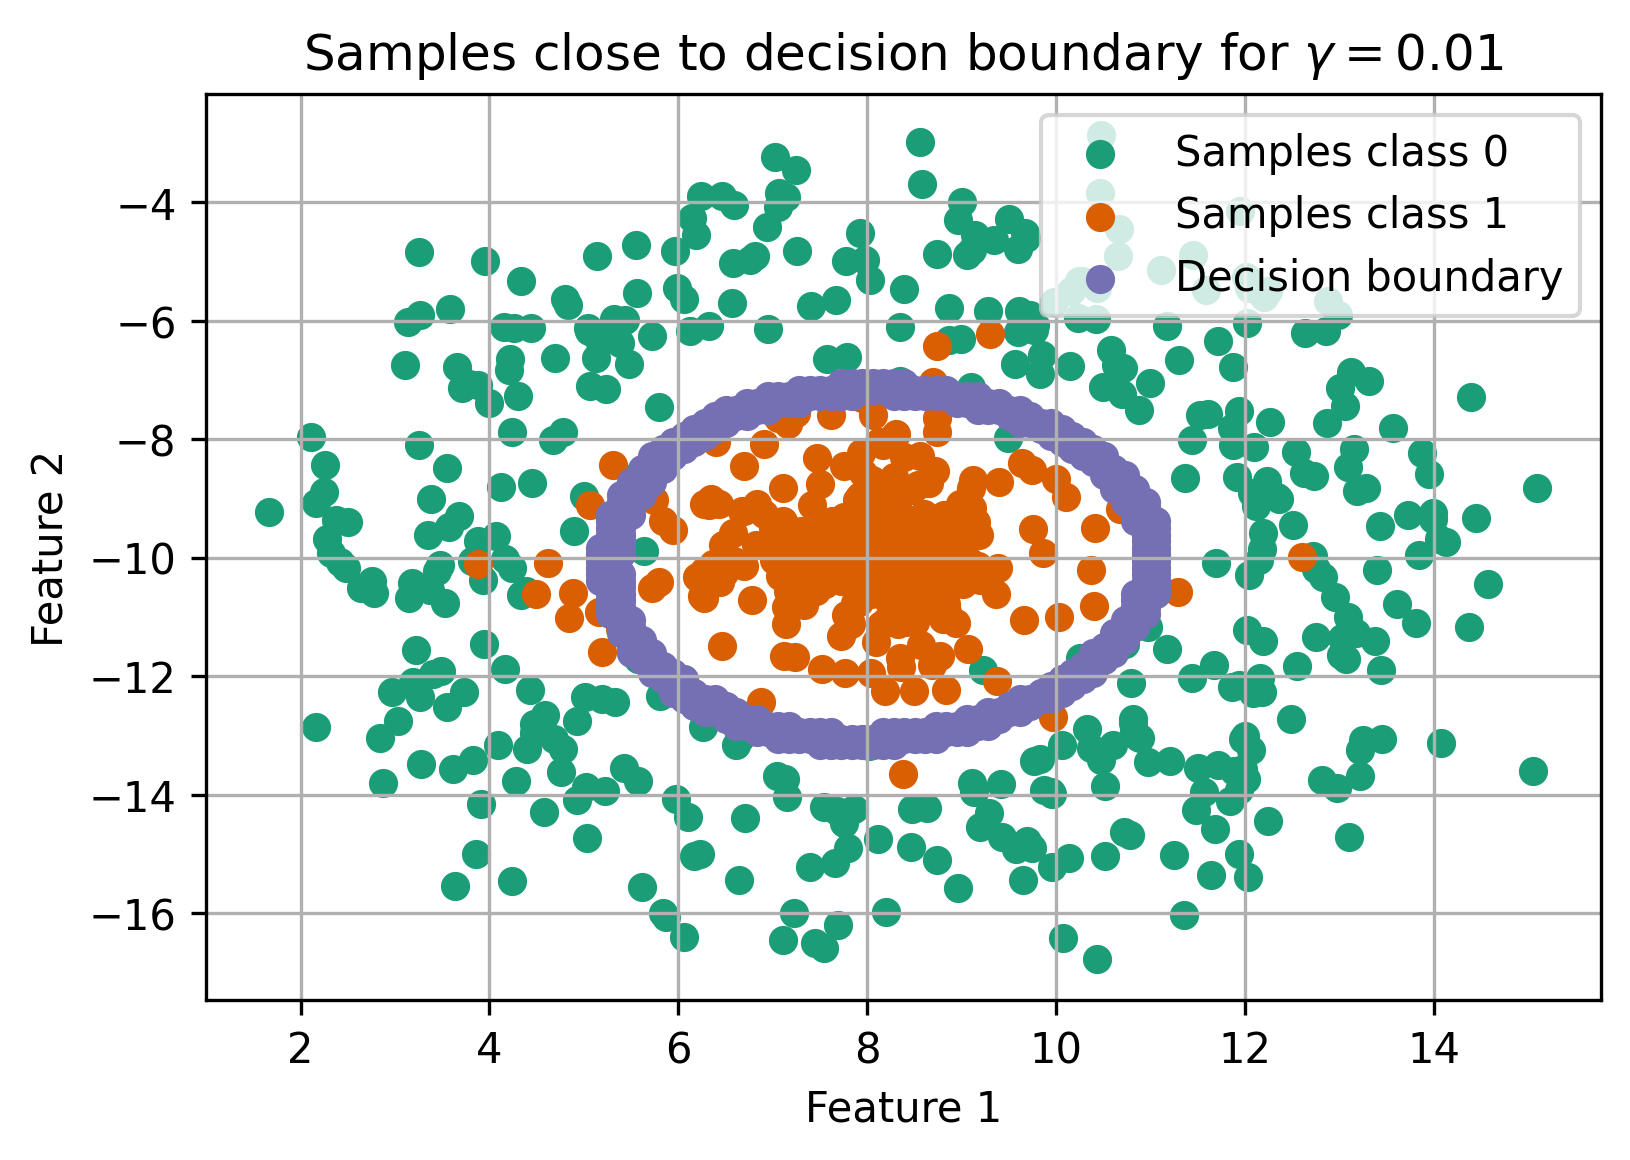

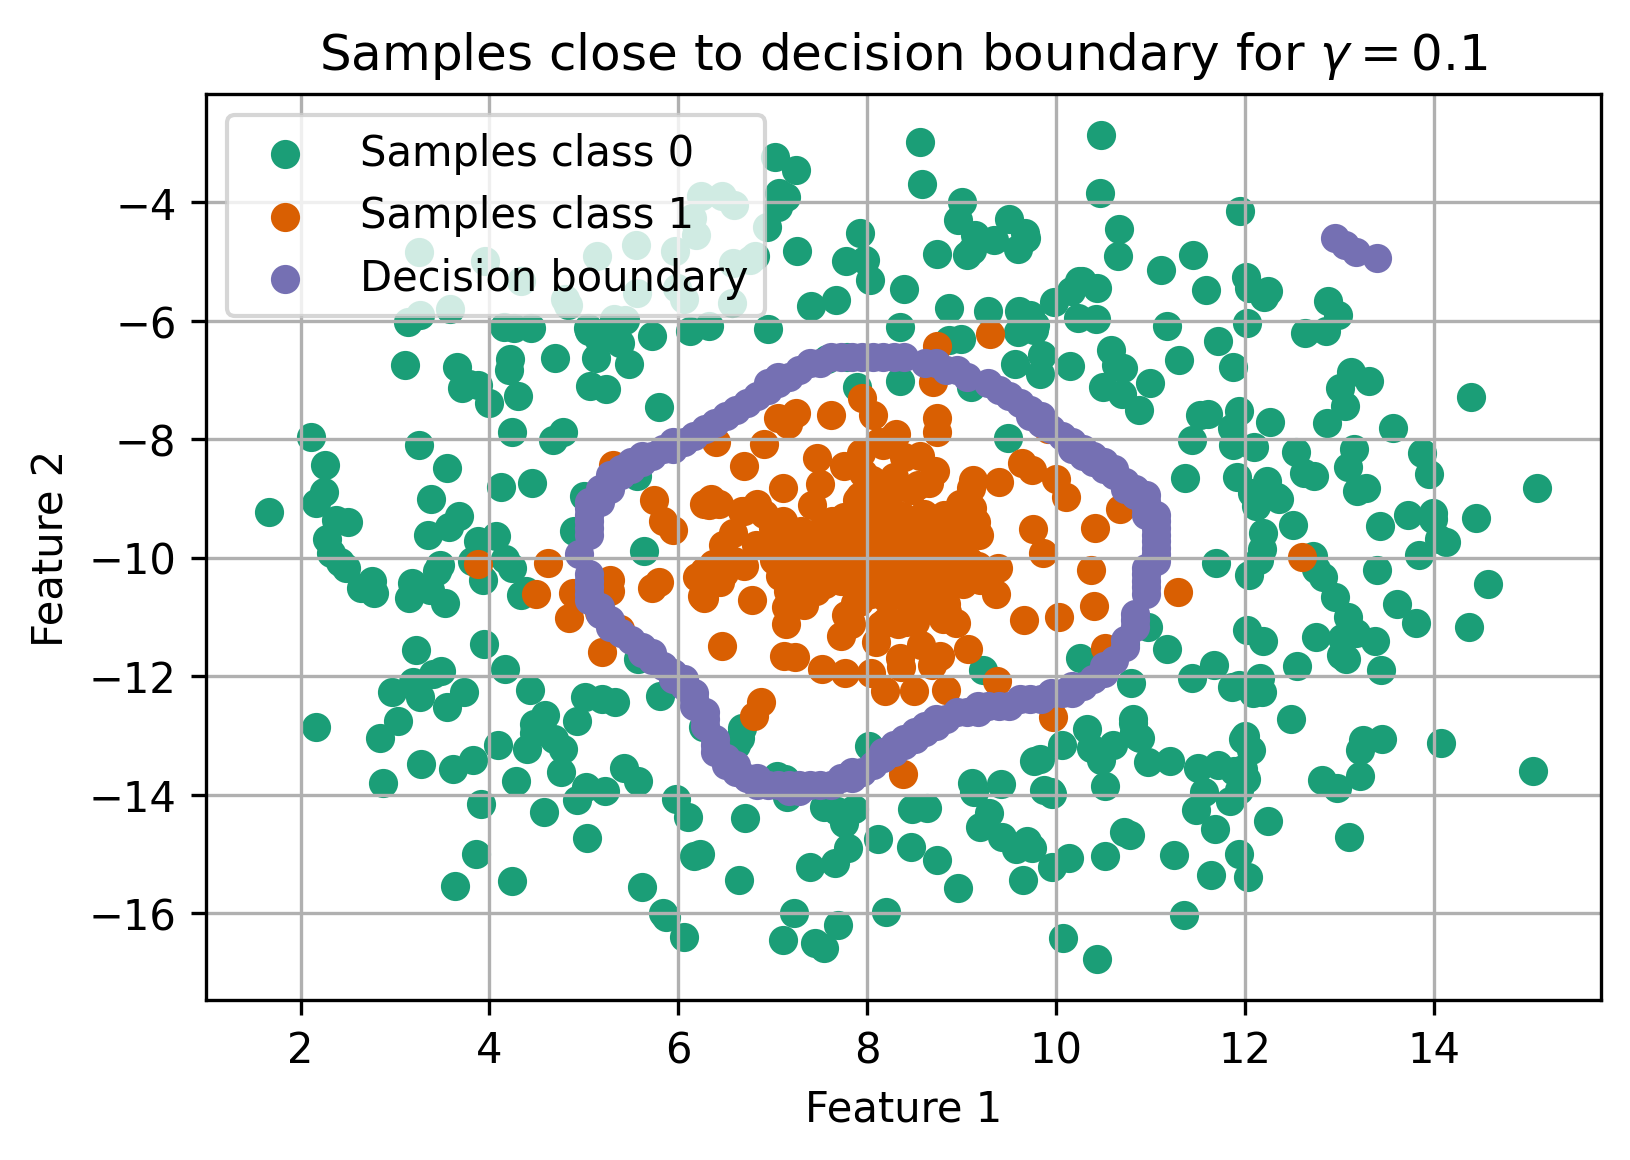

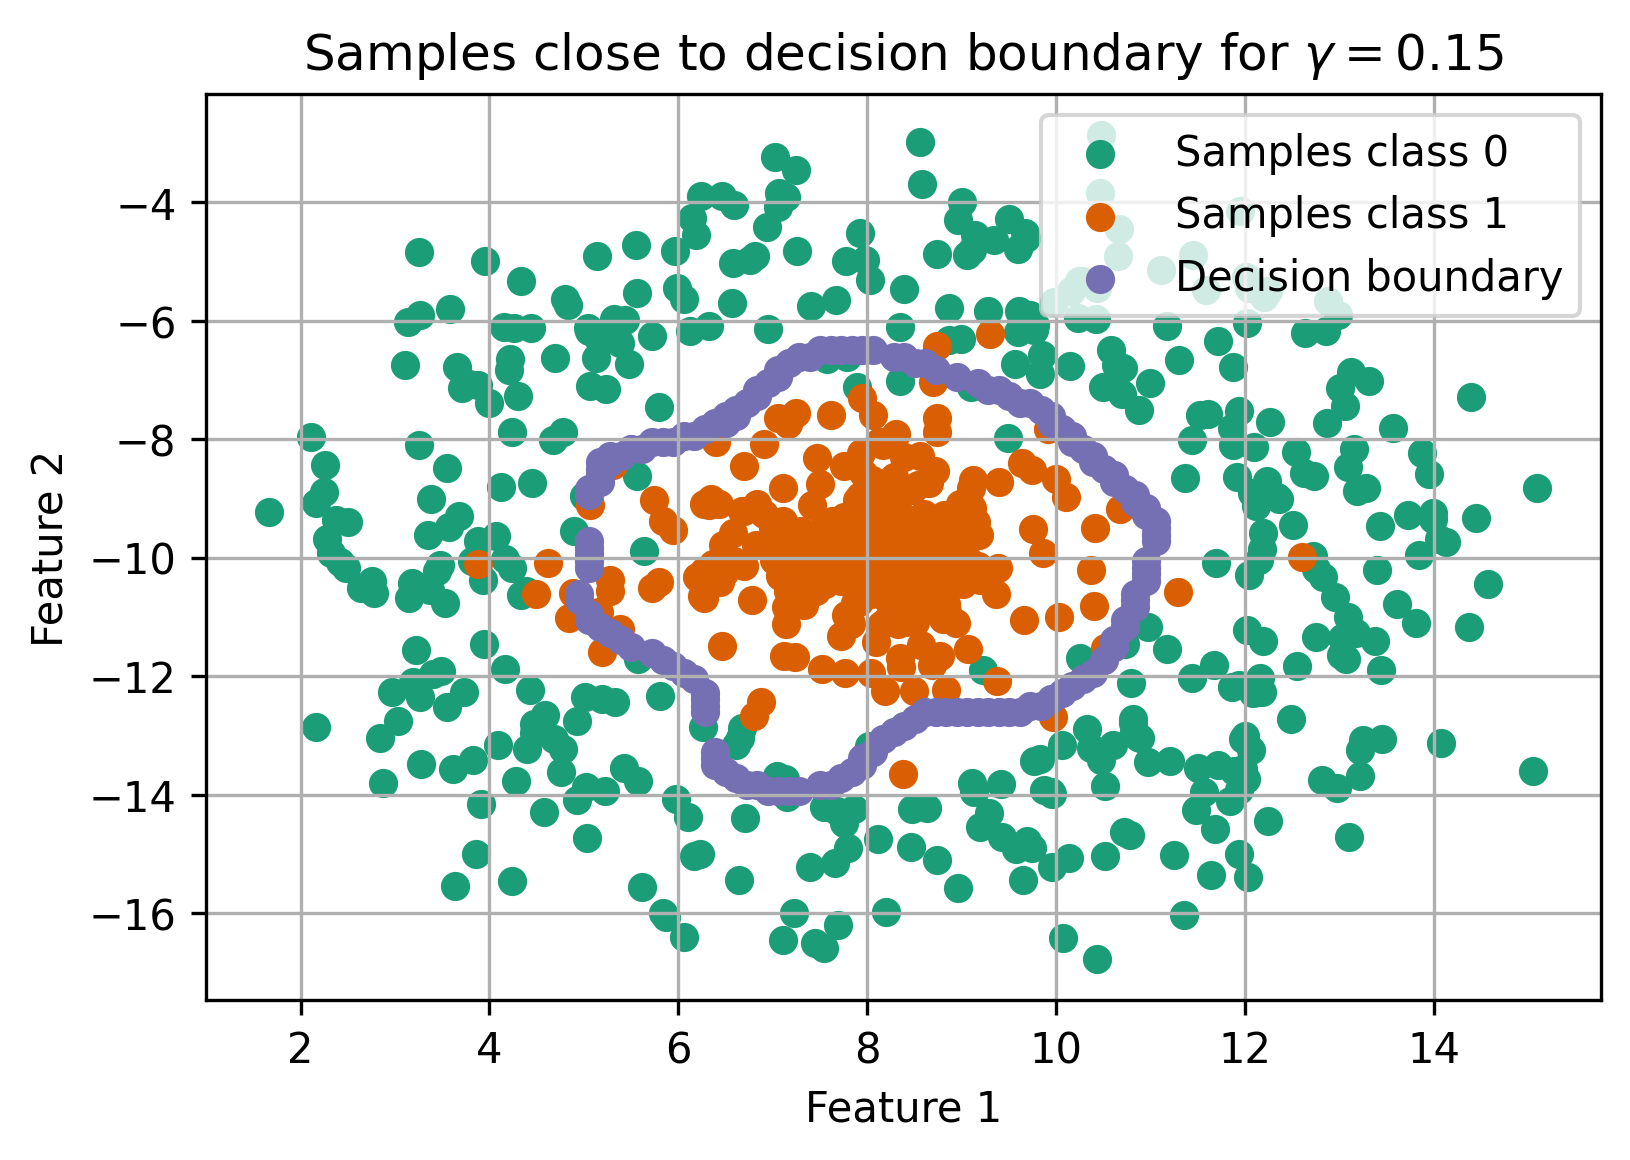

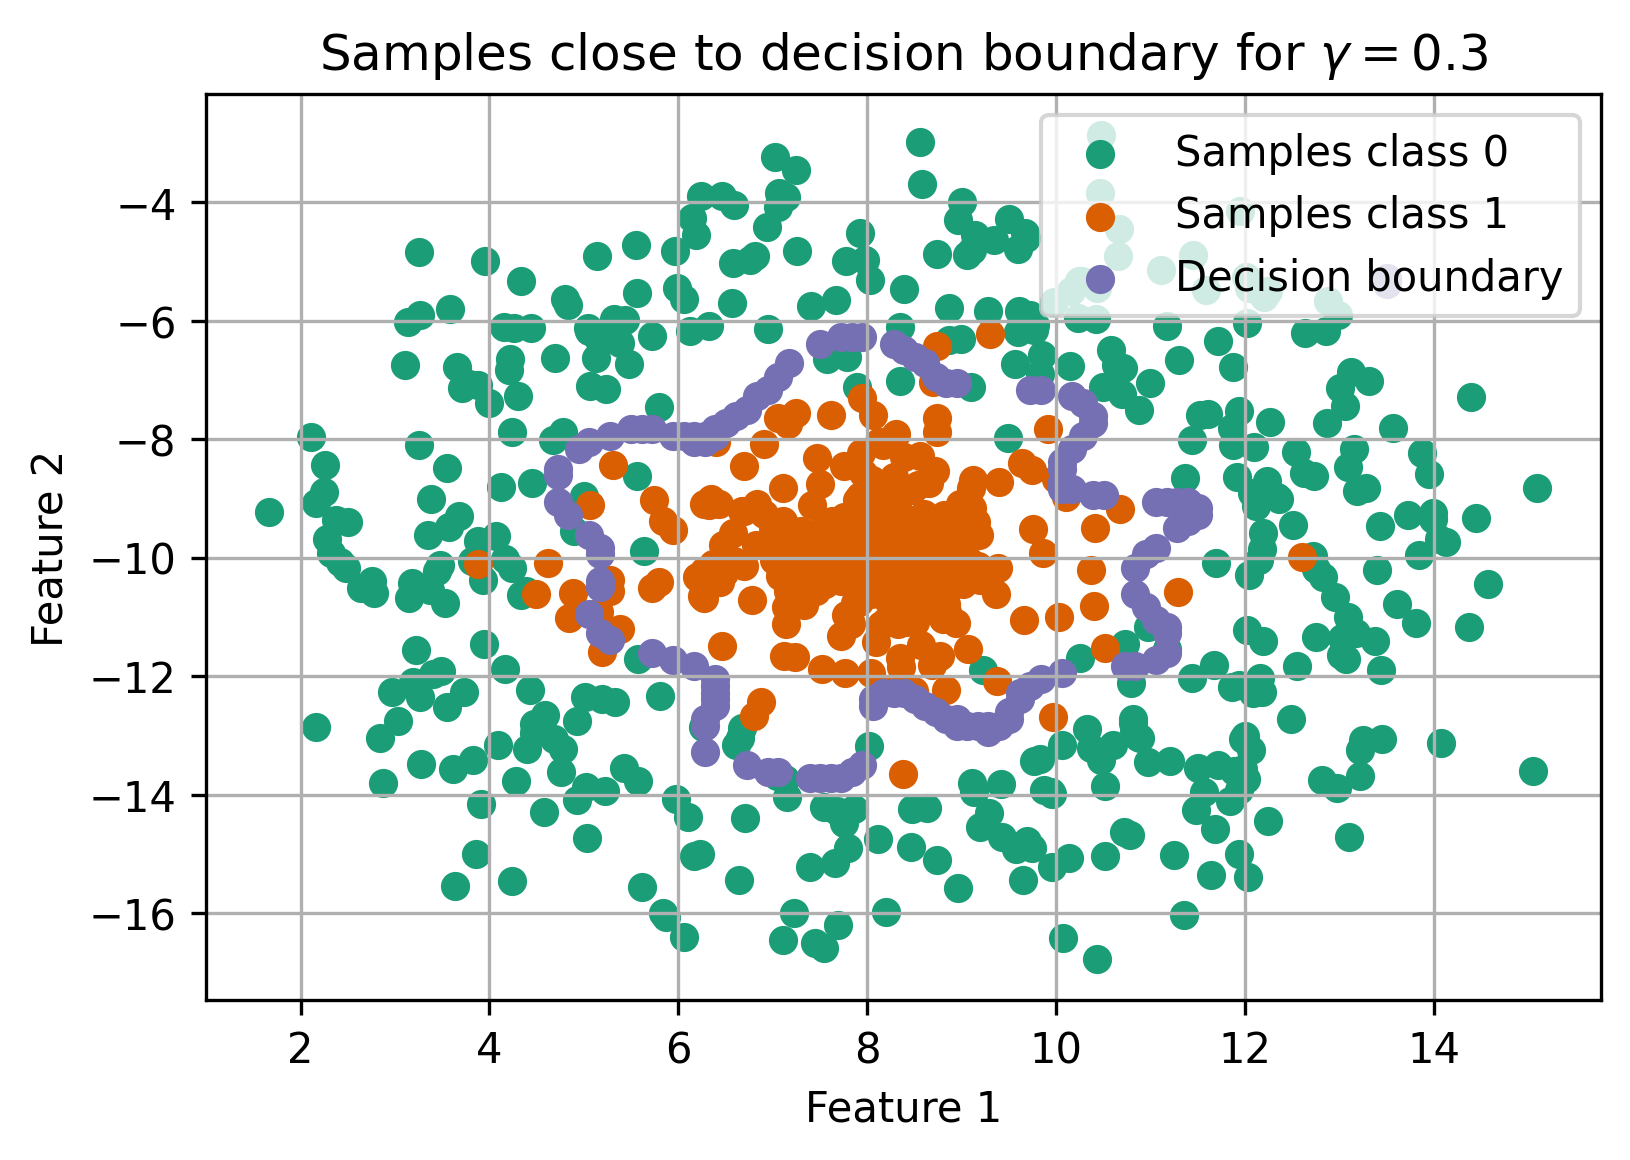

In [27]:
for idx in range(len(gamma)):
    #train classifier for gamma
    classifier_i = Kfda(kernel='rbf', n_components=1, gamma=gamma[idx])
    classifier_i.fit(train_data, train_labels)
    
    #project original features
    projected_i = classifier_i.transform(features)
    
    #transform grid
    z_i = classifier_i.transform(grid)
    z_i = z_i.reshape(xv.shape) 
    
    #set threshold
    tau = 0.01

    #set desicion boundary
    mu = avg_means(projected_i,labels)

    #generate scatterplot
    plt.figure(602 + idx, dpi=300)
    plt.grid()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.scatter(features[~labels,0], features[~labels,1], color='#1b9e77')
    plt.scatter(features[labels,0], features[labels,1], color='#d95f02')
    plt.scatter(xv[np.abs(z_i-mu)<tau], yv[np.abs(z_i-mu)<tau], color='#7570b3')
    plt.legend(['Samples class 0', 'Samples class 1', 'Decision boundary'])
    plt.title("Samples close to decision boundary for $\gamma=$" + str(gamma[idx]))
    plt.show()

Comparing the decision boundaries for the different choices of $\gamma$, one sees again how increasing $\gamma$ means decreasing the sensitivity of the similarity measure. For the smaller values of $\gamma$, the decision boundary is close to elliptical and very thick, which dosn't consider the outliers in our data and refelcts the smaller range of values assigned to the projected features. But for the largest value of $\gamma$, the decision boundary is too complex for the data set, showing signs of overfitting.